<a href="https://colab.research.google.com/github/ImronRosada/Data_Science/blob/main/Probability_Based_Prediction_of_Hotel_Booking_Cancellation_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imron Rosada<BR>
Data Science - Data Analysis<BR>
Probability-Based Prediction of Hotel Booking Cancellation with Machine Learning<BR>

## `BUSINESS DATA UNDERSTANDING`

Mengeksplorasi data untuk mendapatkan wawasan awal serta memastikan kualitas data.

**Business Context**<br>
Perusahaan hotel menghadapi tingkat pembatalan yang tinggi yang berdampak langsung pada pendapatan, efisiensi alokasi kamar, dan peluang penjualan tambahan. Kurangnya pemahaman berbasis data terhadap pola pemesanan dan perilaku pembatalan membuat strategi deposit dan manajemen risiko belum optimal.

**Project Objectives**<br>
Proyek ini bertujuan untuk memprediksi probabilitas pembatalan pemesanan sejak awal proses booking menggunakan model machine learning. Hasil prediksi akan digunakan untuk memicu intervensi proaktif seperti pengingat deposit, promosi last-minute, atau penyesuaian alokasi kamar guna mengurangi risiko pembatalan dan meningkatkan efisiensi operasional.

**Expected Outcomes**<br>
Model prediksi akan membantu hotel mengidentifikasi booking dengan risiko tinggi, memungkinkan strategi overbooking yang lebih terukur, pengelolaan inventaris yang lebih cerdas, dan pengambilan keputusan berbasis data untuk menekan tingkat risiko pembatalan secara efektif.


**Deskripsi Variabel**  

Dataset ini berisi **83.293** entri dan **33** kolom, yang mencakup berbagai aspek dari proses pemesanan hotel, mulai dari waktu pemesanan, profil pelanggan, hingga status reservasi :

| Kolom                             | Deskripsi                                                                              |
| --------------------------------- | -------------------------------------------------------------------------------------- |
| hotel                             | Jenis hotel tempat pemesanan dilakukan, misalnya "Resort Hotel" atau "City Hotel".     |
| is\_canceled                      | Apakah pemesanan dibatalkan (1 = ya, 0 = tidak). (**Target**)                                      |
| lead\_time                        | Jumlah hari antara tanggal pemesanan dan tanggal kedatangan tamu.                      |
| arrival\_date\_year               | Tahun kedatangan tamu ke hotel.                                                        |
| arrival\_date\_month              | Bulan kedatangan tamu (nama bulan, contoh: July, August).                              |
| arrival\_date\_week\_number       | Minggu keberapa dalam tahun saat tamu dijadwalkan tiba.                                |
| arrival\_date\_day\_of\_month     | Tanggal tamu datang dalam bulan tersebut.                                              |
| stays\_in\_weekend\_nights        | Jumlah malam akhir pekan (Sabtu atau Minggu) yang dipesan.                             |
| stays\_in\_week\_nights           | Jumlah malam hari kerja (Senin sampai Jumat) yang dipesan.                             |
| adults                            | Jumlah tamu dewasa dalam pemesanan.                                                    |
| children                          | Jumlah anak-anak dalam pemesanan. Bisa kosong jika tidak ada data.                     |
| babies                            | Jumlah bayi dalam pemesanan.                                                           |
| meal                              | Jenis paket makan dalam pemesanan, seperti BB (bed & breakfast).                       |
| country                           | Kode negara asal tamu, misalnya PRT untuk Portugal.                                    |
| market\_segment                   | Sumber asal pemesanan, misalnya Online Travel Agent (TA) atau pemesanan grup.          |
| distribution\_channel             | Jalur pemesanan digunakan, seperti langsung ke hotel atau lewat agen.                  |
| is\_repeated\_guest               | Apakah tamu ini pernah menginap sebelumnya (1 = ya, 0 = tidak).                        |
| previous\_cancellations           | Jumlah pemesanan sebelumnya oleh tamu yang dibatalkan.                                 |
| previous\_bookings\_not\_canceled | Jumlah pemesanan sebelumnya oleh tamu yang tidak dibatalkan.                           |
| reserved\_room\_type              | Tipe kamar yang dipesan oleh tamu.                                                     |
| assigned\_room\_type              | Tipe kamar yang diberikan saat check-in.                                               |
| booking\_changes                  | Jumlah perubahan yang dilakukan setelah pemesanan awal.                                |
| deposit\_type                     | Jenis deposit yang diminta, misalnya tidak ada deposit atau tidak bisa dikembalikan.   |
| agent                             | ID agen perjalanan yang digunakan (kosong jika tidak lewat agen).                      |
| company                           | ID perusahaan yang memesan kamar (banyak yang kosong).                                 |
| days\_in\_waiting\_list           | Jumlah hari pemesanan masuk daftar tunggu sebelum disetujui.                           |
| customer\_type                    | Jenis tamu, seperti individu (Transient) atau rombongan (Group).                       |
| adr                               | Rata-rata tarif kamar per malam dalam Euro.                                            |
| required\_car\_parking\_spaces    | Jumlah tempat parkir mobil yang diminta tamu.                                          |
| total\_of\_special\_requests      | Jumlah permintaan khusus dari tamu, seperti tempat tidur tambahan atau kamar tertentu. |
| reservation\_status               | Status akhir dari pemesanan: sudah check-out, dibatalkan, atau tidak datang (No-Show). |
| reservation\_status\_date         | Tanggal status akhir tercatat, biasanya saat check-out atau pembatalan.                |
| bookingID                         | Nomor ID untuk setiap pemesanan.                                                       |

Variabel **is\_canceled** merupakan target yang akan diprediksi.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

### Load dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

# # where is your data path
# data_path = '/content/drive/My Drive/Colab Notebooks/Finpro-DS/'

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
# file_name = data_path + 'Zomato Dataset.csv'

In [ ]:
df = pd.read_csv(r'train.csv')
df_hotel = df.copy()
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,"Courtyard by Marriott Aberdeen Airport Aberdeen, United Kingdom",0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


## `DATA PREPARATION`

Langkah-langkah yang dilakukan untuk memastikan data siap digunakan dalam analisis atau pembuatan model.

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

| Kolom                                     | Tipe Data | Observasi                                                                                                |
| ----------------------------------------- | --------- | -------------------------------------------------------------------------------------------------------- |
| `is_canceled`, `is_repeated_guest`        | int64     | Tipe datanya int64, sebenarnya ini biner (0/1), optional ubah ke tipe boolean supaya lebih jelas dan efisien.   |
| `arrival_date_month`                      | object    | Nilai hanya terdiri dari 12 nama bulan; diubah jadi kategori agar hemat memori dan mudah dianalisis.     |
| `reservation_status_date`                 | object    | Format string tanggal; diubah ke datetime agar bisa digunakan dalam analisis waktu.                      |
| `children`                                | float64   | Nilai seharusnya bilangan bulat; ubah ke `int` setelah menangani nilai NaN (misalnya dengan imputasi).   |
| `agent`, `company`                        | float64   | ID (bukan angka perhitungan); banyak missing value, harus ditangani dulu sebelum dikonversi ke kategori. |
| `country`                                 | object    | Ada beberapa nilai null; bisa diimputasi (misalnya: "Unknown") tergantung kebutuhan analisis.            |
| `bookingID`                               | int64     | ID unik pemesanan; lebih cocok disimpan sebagai string karena tidak digunakan untuk operasi numerik.     |
| `children`, `country`, `agent`, `company` | float64, object | Kolom-kolom yang perlu penanganan NaN sebelum dilakukan konversi tipe data atau analisis lebih lanjut.   |

In [ ]:
# 1. Ubah is_canceled dan is_repeated_guest ke boolean
# df_hotel['is_canceled'] = df_hotel['is_canceled'].astype(bool)
df_hotel['is_repeated_guest'] = df_hotel['is_repeated_guest'].astype(bool)

# 2. Ubah arrival_date_month ke kategori
df_hotel['arrival_date_month'] = df_hotel['arrival_date_month'].astype('category')

# 3. Ubah reservation_status_date ke datetime
df_hotel['reservation_status_date'] = pd.to_datetime(df_hotel['reservation_status_date'], errors='coerce')

# 4. Tangani missing value di children (float64), ubah ke int
# df_hotel['children'] = df_hotel['children'].fillna(0).astype(int)

# 5. Tangani missing value di agent dan company (float64)
# df_hotel['agent'] = df_hotel['agent'].fillna('Unknown').astype('category')
# df_hotel['company'] = df_hotel['company'].fillna('Unknown').astype('category')

# 6. Tangani missing value di country (object)
# df_hotel['country'] = df_hotel['country'].fillna('Unknown')

# 7. Ubah bookingID ke string karena merupakan ID unik
df_hotel['bookingID'] = df_hotel['bookingID'].astype(str)

In [ ]:
df_hotel[['is_canceled', 'is_repeated_guest', 'arrival_date_month', 'reservation_status_date', 'bookingID']].head()

,is_canceled,is_repeated_guest,arrival_date_month,reservation_status_date,bookingID
0,0,False,January,2019-01-14,1
1,1,False,December,2017-10-21,2
2,1,False,May,2018-11-25,3
3,0,False,October,2018-10-18,4
4,1,False,September,2017-08-24,5


In [ ]:
df_hotel.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                      category
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [ ]:
# Numerik (Int dan Float)
numerik = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


# Kategorik(object, string, datetime, bool)
kategorik = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
    'is_canceled', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'agent', 'company', 'customer_type', 'reservation_status', 'reservation_status_date', 'bookingID']

### Duplicate Handling

In [ ]:
len(df_hotel.drop_duplicates()) / len(df_hotel)

1.0

In [ ]:
duplicates = df_hotel[df_hotel.duplicated(keep=False)]
print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID


Nilai pada tabel `kosong` menandakan tidak ada baris yang duplikat

### Missing Value Handling

In [ ]:
df_hotel[df_hotel.isna().any(axis=1)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,False,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,False,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,"Courtyard by Marriott Aberdeen Airport Aberdeen, United Kingdom",0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,False,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83288,"Crystal Cove, Barbados Barbados",0,4,2018,October,44,25,0,2,2,1.0,0,BB,FRA,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,169.00,1,1,Check-Out,2018-10-27,83289
83289,"Berlin Marriott Hotel Berlin, Germany",0,30,2017,September,38,14,1,3,2,0.0,0,BB,CHE,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,94.50,0,2,Check-Out,2017-09-18,83290
83290,"The Ritz-Carlton, Tokyo Tokyo, Japan",0,165,2019,June,25,21,4,10,2,0.0,0,BB,IRL,Direct,Direct,False,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,123.50,0,1,Check-Out,2019-07-05,83291
83291,"Colony Club, Barbados Barbados",0,180,2018,July,32,31,2,4,2,1.0,0,BB,DEU,Online TA,TA/TO,False,0,0,A,D,0,No Deposit,9.0,NaN,0,Transient,122.25,0,1,Check-Out,2018-08-06,83292


In [ ]:
total_rows = len(df_hotel)

for column in df_hotel.columns:
   # if column != 'customerID':
        missing_count = df_hotel[column].isna().sum()
        missing_percentage = (missing_count / total_rows) * 100
        print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'hotel' Has 0 missing values (0.00%)
Column 'is_canceled' Has 0 missing values (0.00%)
Column 'lead_time' Has 0 missing values (0.00%)
Column 'arrival_date_year' Has 0 missing values (0.00%)
Column 'arrival_date_month' Has 0 missing values (0.00%)
Column 'arrival_date_week_number' Has 0 missing values (0.00%)
Column 'arrival_date_day_of_month' Has 0 missing values (0.00%)
Column 'stays_in_weekend_nights' Has 0 missing values (0.00%)
Column 'stays_in_week_nights' Has 0 missing values (0.00%)
Column 'adults' Has 0 missing values (0.00%)
Column 'children' Has 3 missing values (0.00%)
Column 'babies' Has 0 missing values (0.00%)
Column 'meal' Has 0 missing values (0.00%)
Column 'country' Has 346 missing values (0.42%)
Column 'market_segment' Has 0 missing values (0.00%)
Column 'distribution_channel' Has 0 missing values (0.00%)
Column 'is_repeated_guest' Has 0 missing values (0.00%)
Column 'previous_cancellations' Has 0 missing values (0.00%)
Column 'previous_bookings_not_canceled' 

In [ ]:
df_missing_text = df_hotel.select_dtypes(include=['object', 'float64', 'datetime64[ns]', 'int64', 'bool']).melt(var_name="Column", value_name="Tipe")
df_missing_text = df_missing_text[df_missing_text["Tipe"].isna()].copy()
df_missing_text["Missing Type"] = df_missing_text["Tipe"].apply(lambda x: "NaN" if isinstance(x, float) and np.isnan(x) else "NaT" if pd.isna(x) else "Unknown")
df_missing_text = (df_missing_text.groupby(["Column", "Missing Type"]).size().reset_index(name="Amount"))
df_missing_text["Percentage (%)"] = ((df_missing_text["Amount"] / len(df_hotel)) * 100).map(lambda x: f"{x:.2f}%")
df_missing_text = df_missing_text.sort_values(by=["Column", "Amount"], ascending=[True, False]).reset_index(drop=True)
df_missing_text

,Column,Missing Type,Amount,Percentage (%)
0,agent,NaN,11404,13.69%
1,children,NaN,3,0.00%
2,company,NaN,78559,94.32%
3,country,NaN,346,0.42%


Terdeteksi sebagai missing values berbasis teks (**NaN**)

- company: missing value sangat tinggi (94.32%), berupa ID dan tidak terlalu penting, jadi dihapus.
- agent: missing value 13.69%, berupa ID dan masih berguna untuk analisis, lalu ubah ke kategori.
- children: missing sangat sedikit (0.00%), mengisi nilai kosong dengan 0 (karena bisa berarti tidak membawa anak), lalu mengubah tipe data menjadi integer.
- country: missing sedikit (0.42%), mengisi dengan "Unknown" atau modus (negara yang paling sering muncul), sesuai kebutuhan analisis.

Aturan missing value handling :
1. jika tipe datanya numerik -> handling menggunakan median (robust / tahan terhadap outlier)
2. jika tipe datanya kategorik / object / string -> handling menggunakan mode / modus karena merepresentasikan kategori yang paling umum atau sering muncul sehingga dapat mempertahankan distribusi kategori.
3. Jika tipe datanya datetime -> handling dilakukan dengan menggunakan median sama seperti data numerik karena datetime dapat diurutkan secara alami artinya ada urutan waktu yang jelas: tahun, bulan, hari, jam, menit, detik. sehingga median dapat merepresentasikan nilai tengah lebih akurat.

In [ ]:
# 1. company missing value 94.32%
# Hapus kolom 'company' karena missing value-nya terlalu tinggi
df_hotel.drop(columns='company', inplace=True)

In [ ]:
# 2. agent missing value 13.69%
# Isi missing dengan (median) -> ubah ke tipe kategorikal
median_values = df_hotel[['agent']].median()
median_values

agent    14.0
dtype: float64

In [ ]:
df_hotel['agent'] = df_hotel['agent'].apply(lambda x: median_values['agent'] if pd.isna(x) or x == 'NaN' or x == 'NaT' else x)
df_hotel['agent'] = df_hotel['agent'].astype(int).astype('category')

In [ ]:
# # 2. agent missing value 13.69%
# # Isi missing dengan 0 (artinya tidak melalui agen), -> ubah ke tipe kategorikal
# df_hotel['agent'] = df_hotel['agent'].fillna(0)
# df_hotel['agent'] = df_hotel['agent'].astype(int).astype('category')

In [ ]:
# 3. children missing value 3 (0.004%)
# Isi missing dengan 0 (artinya tidak ada anak) -> ubah ke int
df_hotel['children'] = df_hotel['children'].fillna(0)
df_hotel['children'] = df_hotel['children'].astype(int)

In [ ]:
# 4. country missing value 0.42%
# Menghitung modus untuk kolom kategorik
mode_values = df_hotel[['country']].mode().iloc[0]
mode_values

country    PRT
Name: 0, dtype: object

In [ ]:
# Mengganti nilai yang hilang (termasuk 'NaT' dan 'NaN' teks) dengan modus untuk kolom kategorik
df_hotel['country'] = df_hotel['country'].apply(lambda x: mode_values['country'] if pd.isna(x) or x == 'NaN' or x == 'NaT' else x)

In [ ]:
# menggunakan isna, isnull, dan sum
df_hotel.isna().sum()
# df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Semua kolom memiliki 0 missing values, imputasi atau penanganan missing values telah berhasil dilakukan.

### Outlier Handling


In [ ]:
from scipy import stats
def check_plot(df_hotel, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_hotel[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_hotel[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_hotel[variable])
    plt.title('Boxplot')
    plt.show()

In [ ]:
df_hotel.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                      category
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [ ]:
print(numerik)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
df_hotel['is_canceled'].value_counts()

is_canceled
0    52516
1    30777
Name: count, dtype: int64

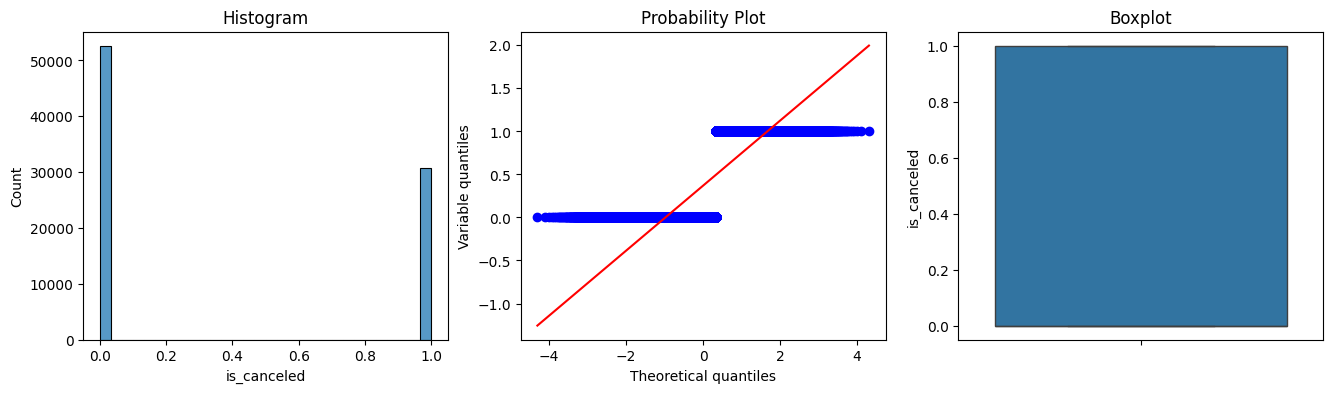

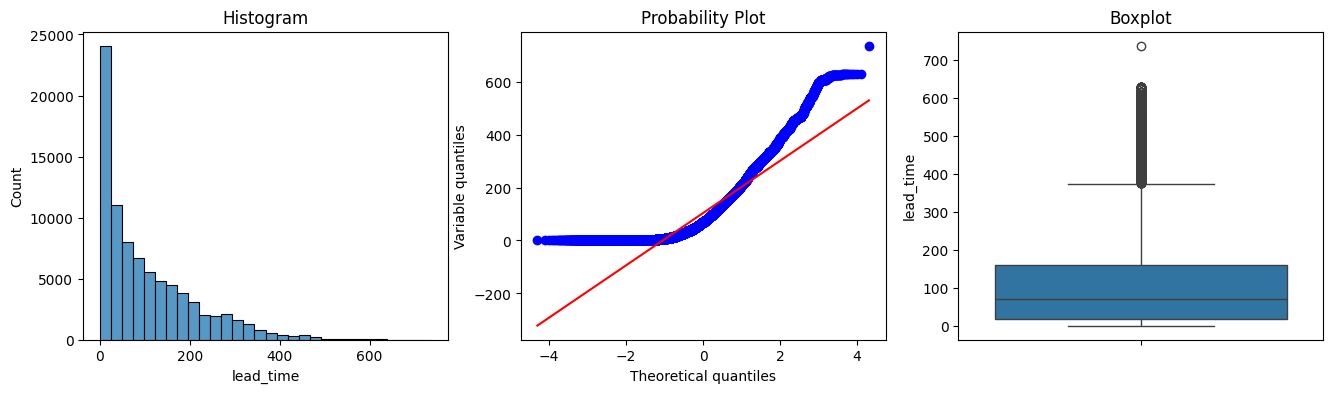

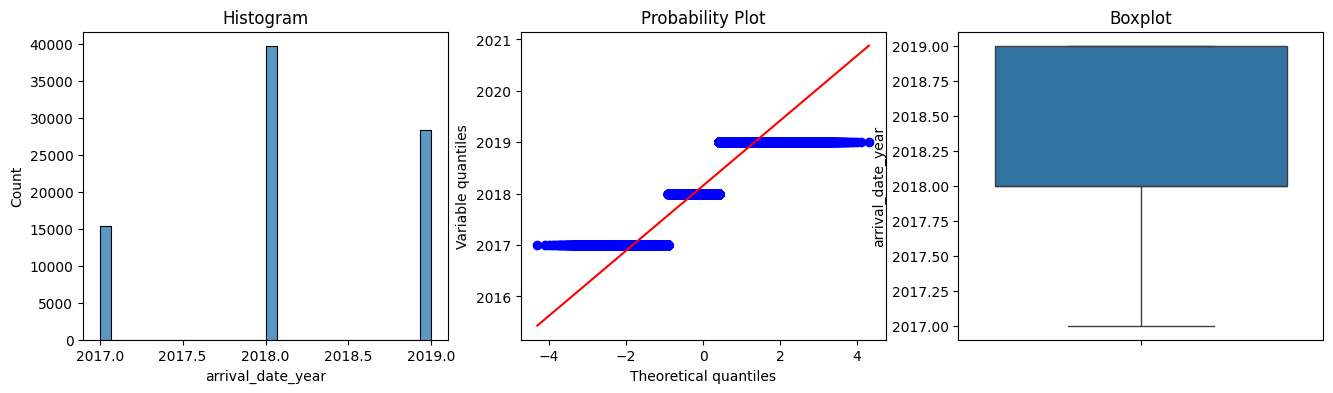

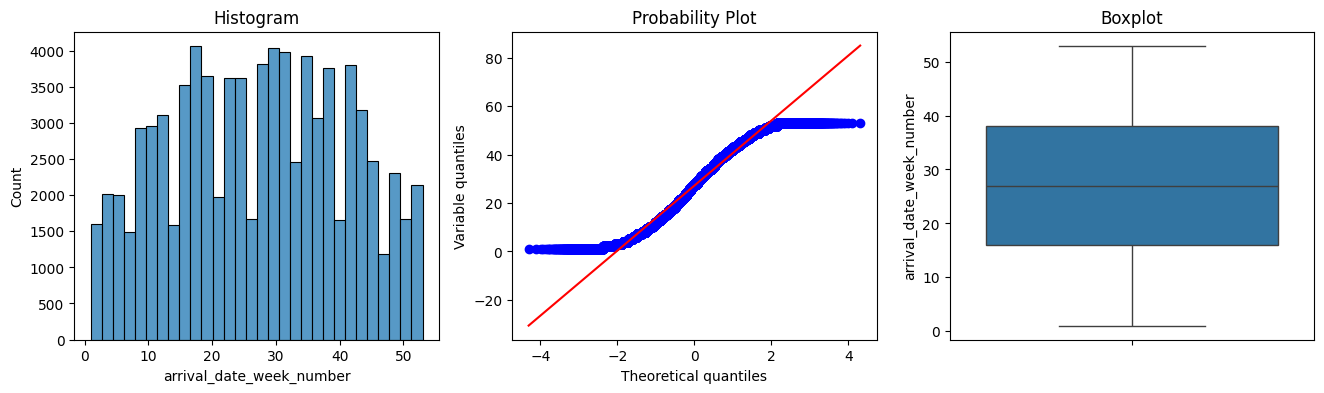

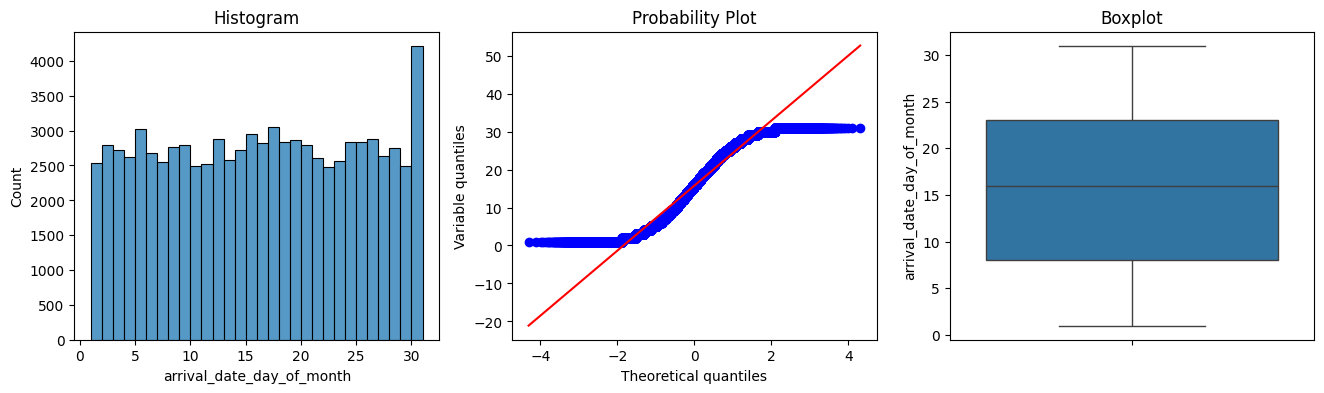

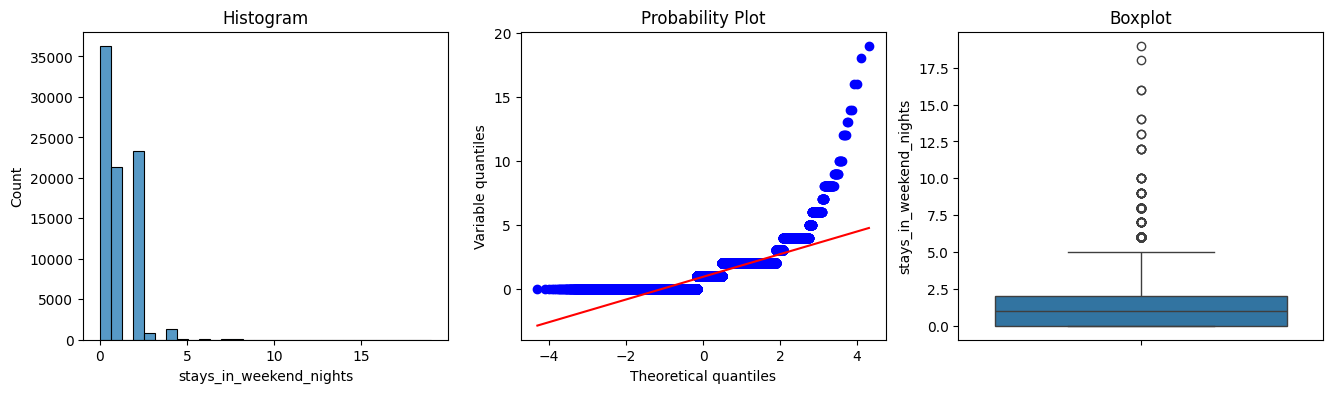

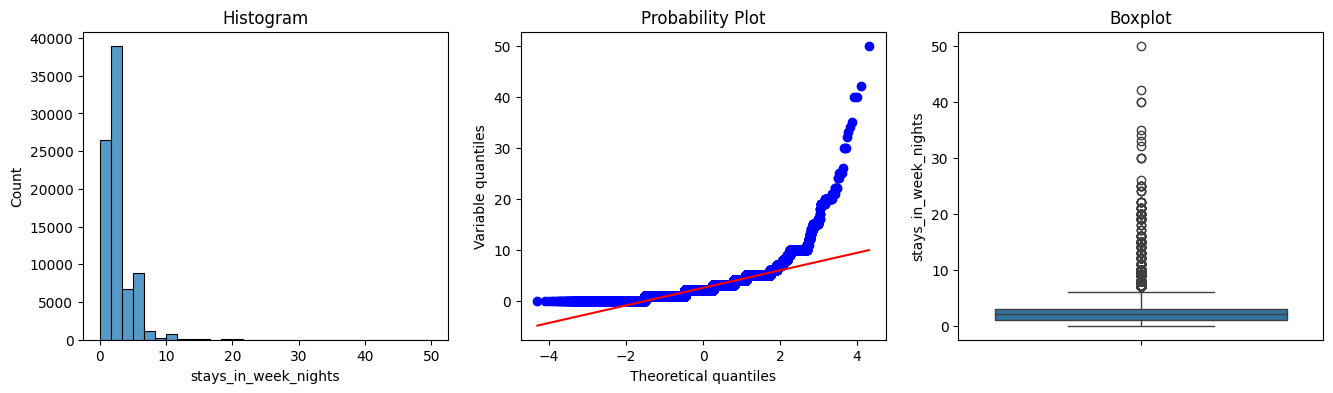

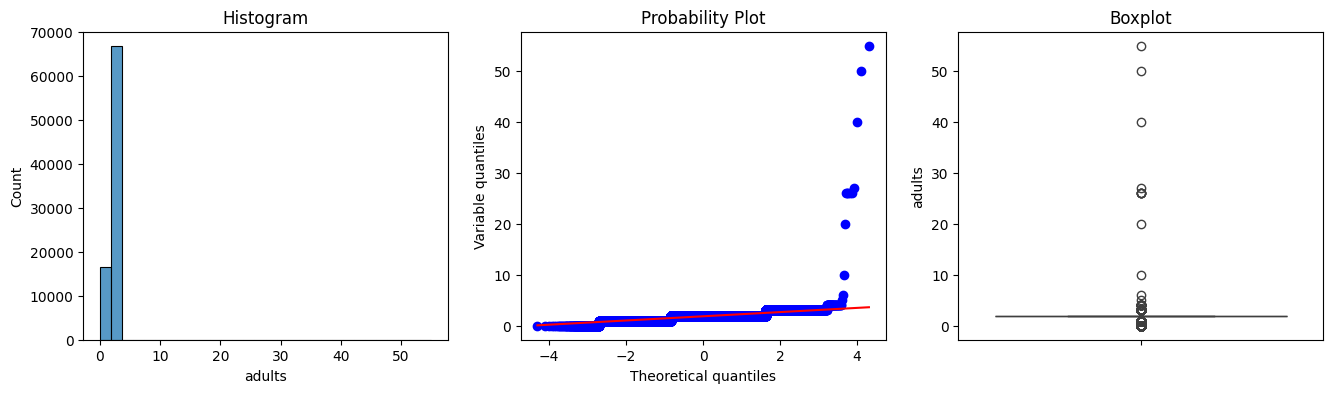

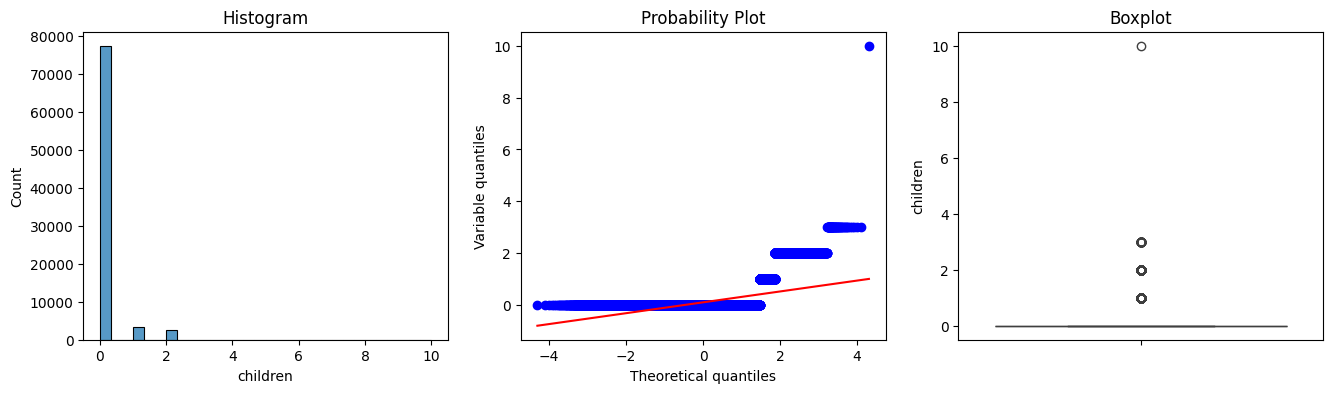

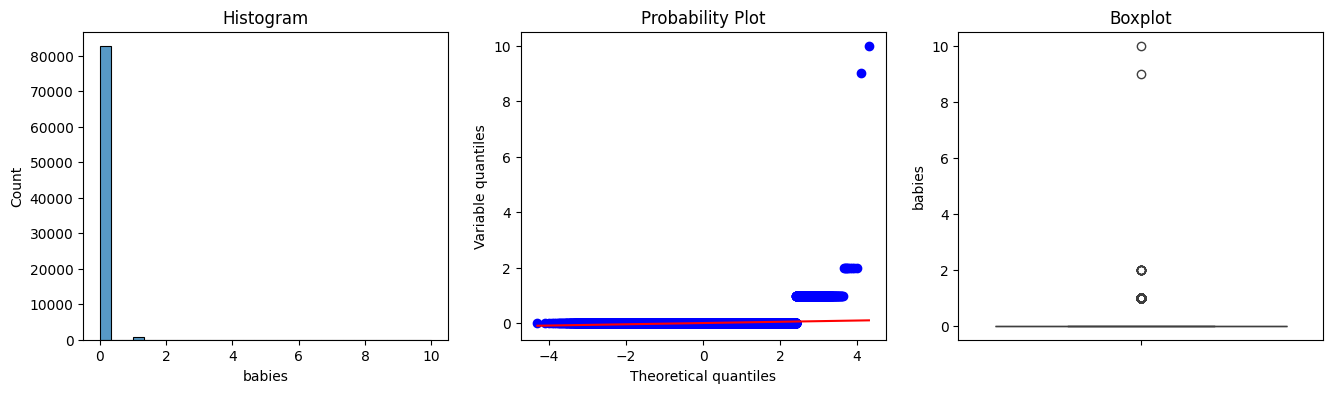

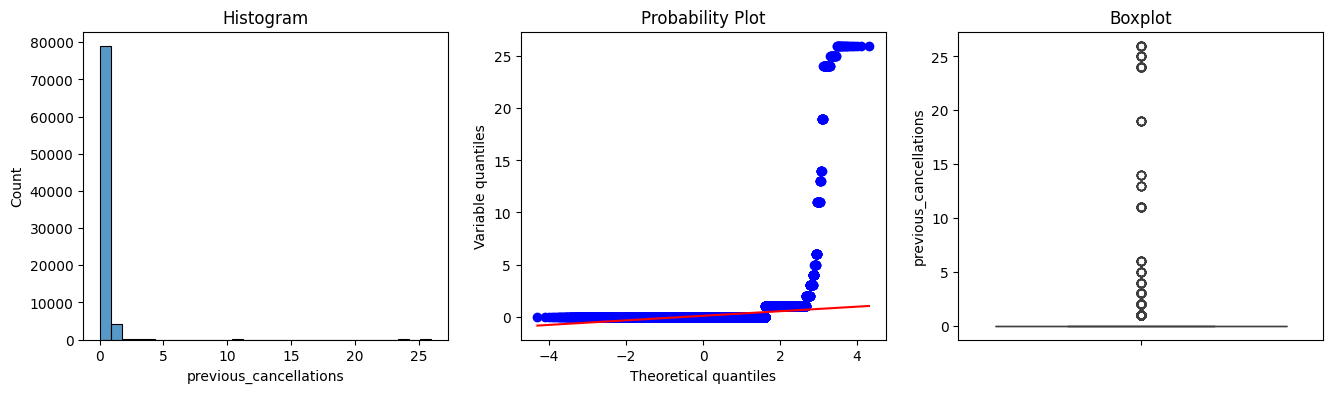

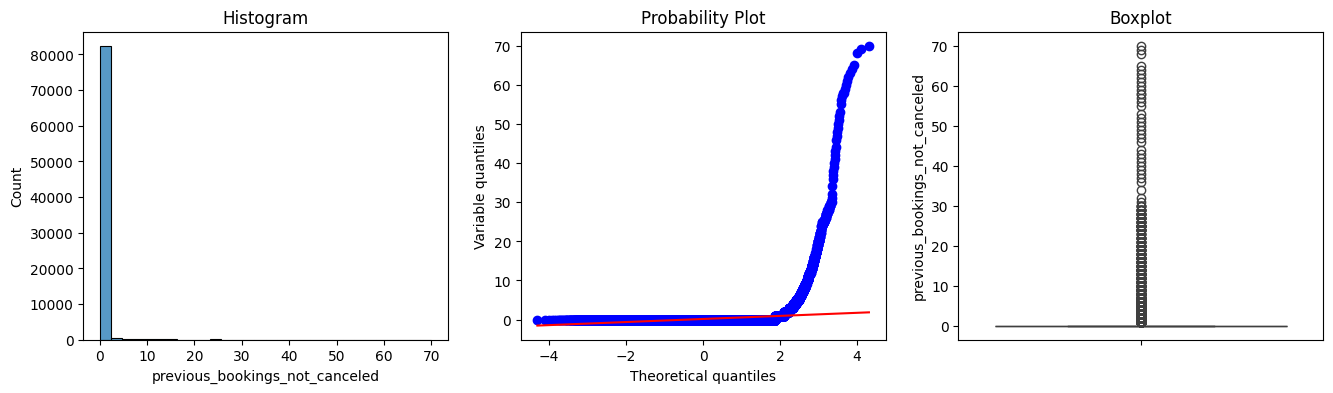

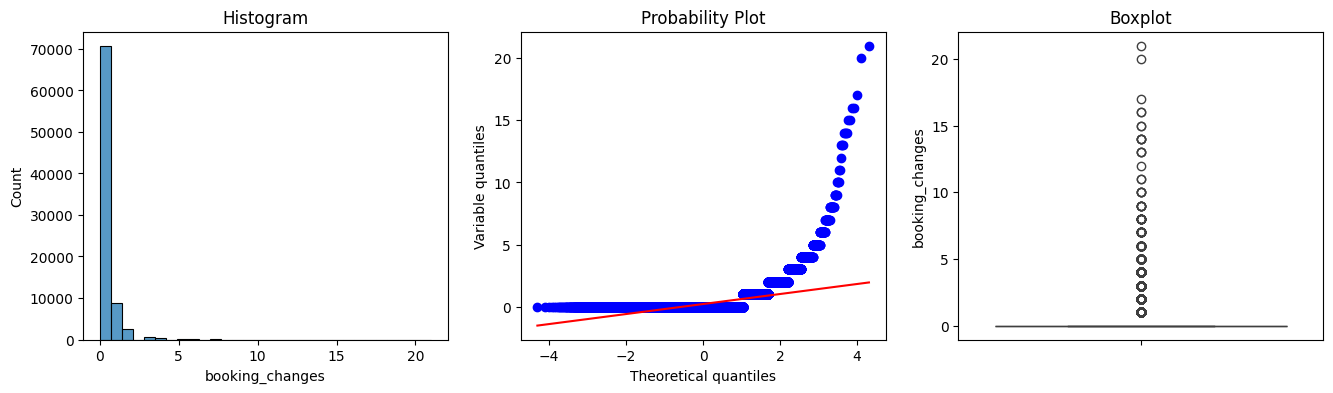

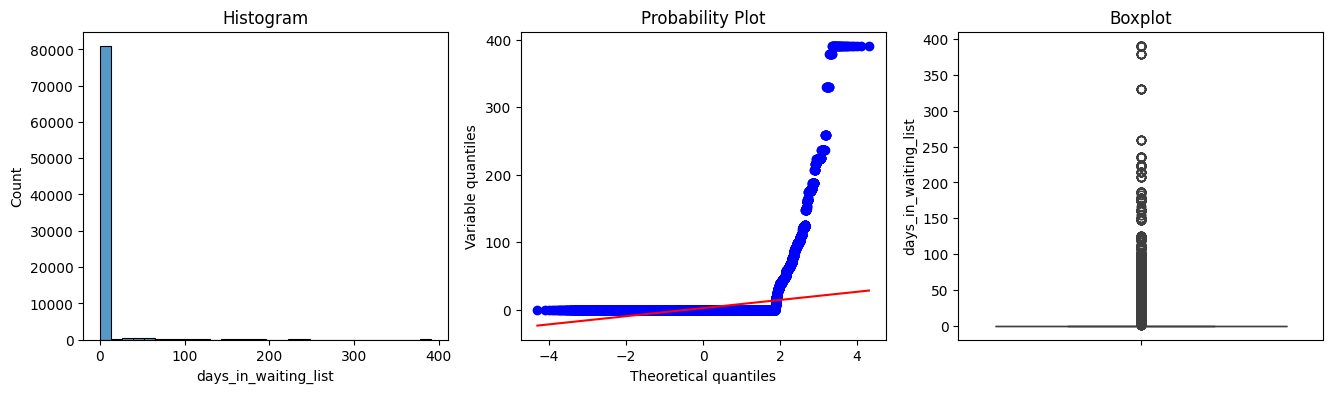

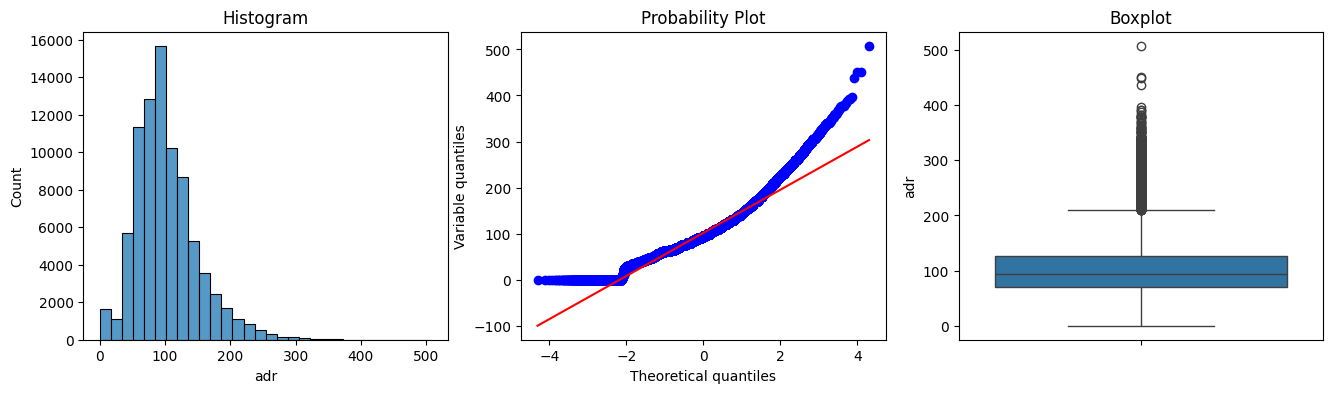

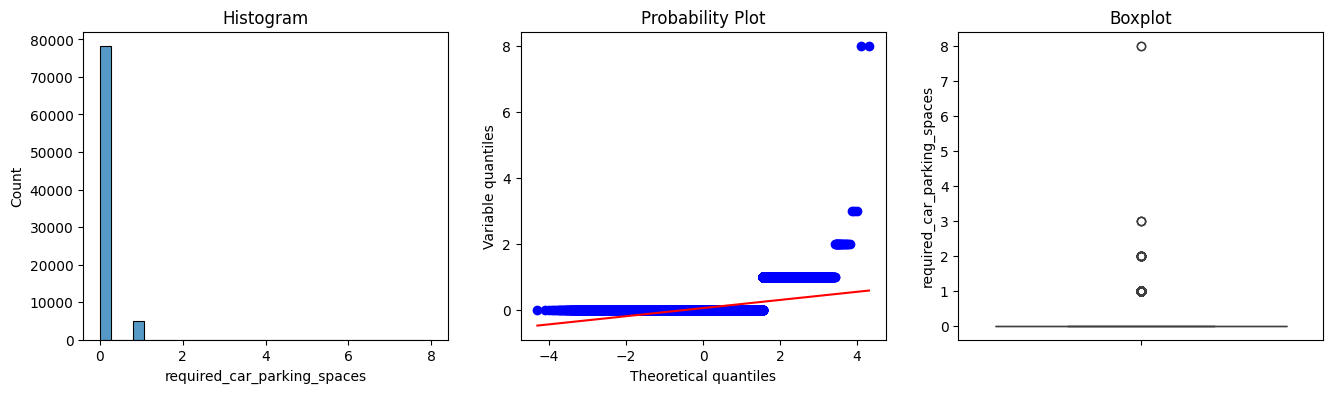

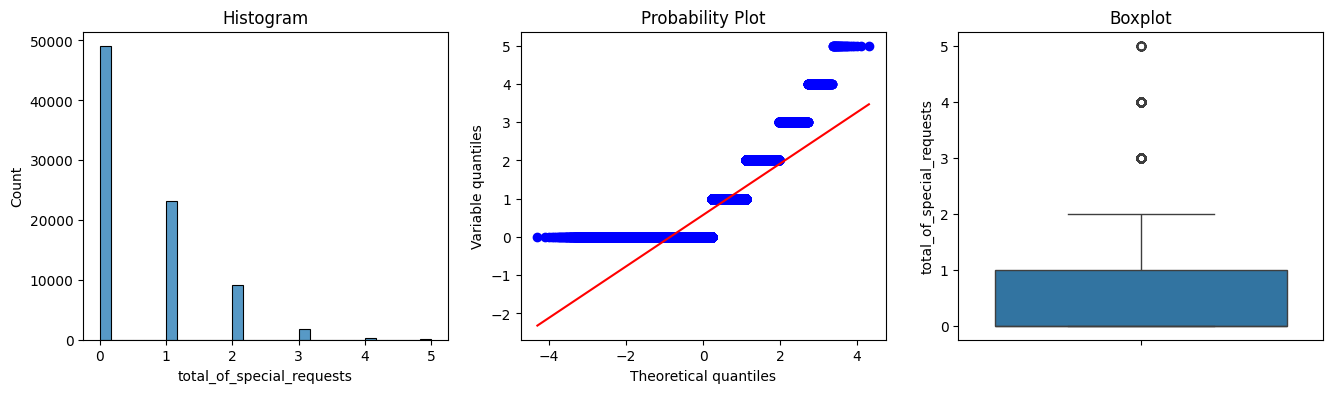

In [ ]:
# Memvisualisasikan outlier
for kolom in ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']:
    df_hotel_num = df_hotel.copy()
    check_plot(df_hotel_num, kolom)

In [ ]:
print(numerik)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
def calc_outliers(df_hotel, column):
    q1 = df_hotel[column].quantile(0.25)
    q3 = df_hotel[column].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr

    print(f"\n[{column}]")
    print(f"Q1: {q1:.2f}, Median: {df_hotel[column].median():.2f}, Q3: {q3:.2f}")
    print(f"Upper Fence: {upper_fence:.2f}, Lower Fence: {lower_fence:.2f}")
    print(f"Min: {df_hotel[column].min():.2f}, Max: {df_hotel[column].max():.2f}")

    outliers_upper = df_hotel[df_hotel[column] > upper_fence][column]
    outliers_lower = df_hotel[df_hotel[column] < lower_fence][column]

    print(f"Outliers di atas Upper Fence: {list(outliers_upper)}")
    print(f"Outliers di bawah Lower Fence: {list(outliers_lower)}")

# Daftar kolom yang akan dicek
columns_to_check = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

for col in columns_to_check:
    calc_outliers(df_hotel, col)


[is_canceled]
Q1: 0.00, Median: 0.00, Q3: 1.00
Upper Fence: 2.50, Lower Fence: -1.50
Min: 0.00, Max: 1.00
Outliers di atas Upper Fence: []
Outliers di bawah Lower Fence: []

[lead_time]
Q1: 18.00, Median: 69.00, Q3: 160.00
Upper Fence: 373.00, Lower Fence: -195.00
Min: 0.00, Max: 737.00
Outliers di atas Upper Fence: [524, 395, 405, 396, 448, 385, 411, 524, 429, 489, 468, 405, 443, 386, 386, 393, 411, 387, 377, 629, 447, 378, 405, 457, 386, 443, 405, 440, 507, 386, 405, 542, 420, 464, 448, 377, 521, 396, 393, 465, 423, 386, 396, 504, 405, 393, 377, 386, 447, 379, 542, 447, 479, 396, 433, 594, 479, 398, 468, 377, 390, 542, 437, 605, 386, 461, 407, 414, 457, 377, 566, 418, 444, 454, 393, 405, 409, 393, 629, 524, 381, 521, 531, 386, 468, 407, 386, 545, 386, 395, 396, 405, 379, 622, 468, 374, 462, 434, 391, 457, 414, 385, 377, 414, 423, 444, 420, 426, 573, 420, 391, 518, 461, 393, 447, 605, 434, 587, 531, 496, 490, 377, 437, 383, 434, 377, 608, 379, 461, 422, 587, 457, 542, 464, 566, 626, 

Z-score memberikan gambaran seberapa jauh data dari rata-rata dan membantu kita mengetahui apakah data tersebut perlu diperiksa lebih lanjut atau tidak.

In [ ]:
def check_outliers_zscore(df_hotel, column, window=100, threshold=2.5):
    df_hotel["rolling_mean"] = df_hotel[column].rolling(window=window, center=True).mean()
    df_hotel["rolling_std"] = df_hotel[column].rolling(window=window, center=True).std()

    df_hotel["z_score"] = (df_hotel[column] - df_hotel["rolling_mean"]) / df_hotel["rolling_std"]

    outliers = df_hotel[(df_hotel["z_score"].abs() > threshold)]
    print(f"\n[{column}]")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[column, "z_score"]].head())

for col in ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']:
    check_outliers_zscore(df_hotel, col)


[is_canceled]
Jumlah outlier: 0
Empty DataFrame
Columns: [is_canceled, z_score]
Index: []

[lead_time]
Jumlah outlier: 2102
     lead_time   z_score
60         405  3.101835
78         396  2.734973
122        448  3.098088
186        524  3.351144
204        429  2.597780

[arrival_date_year]
Jumlah outlier: 0
Empty DataFrame
Columns: [arrival_date_year, z_score]
Index: []

[arrival_date_week_number]
Jumlah outlier: 0
Empty DataFrame
Columns: [arrival_date_week_number, z_score]
Index: []

[arrival_date_day_of_month]
Jumlah outlier: 0
Empty DataFrame
Columns: [arrival_date_day_of_month, z_score]
Index: []

[stays_in_weekend_nights]
Jumlah outlier: 1471
     stays_in_weekend_nights   z_score
59                         4  2.541826
63                         4  2.541826
84                         6  4.081551
126                        4  2.653577
208                        4  3.012056

[stays_in_week_nights]
Jumlah outlier: 1862
     stays_in_week_nights   z_score
59                     

In [ ]:
# drop kolom feature
df_hotel = df_hotel.drop(columns=['rolling_mean', 'rolling_std', 'z_score'])

| **Kolom**                   | **Lower Fence** | **Upper Fence** | **Outlier Bawah** | **Outlier Atas** | **Observasi**                                                                    |
| --------------------------- | --------------- | --------------- | ----------------- | ---------------- | ------------------------------------------------------------------------------- |
| `lead_time`                 | -195.00         | 373.00          | Tidak ada         | Ada (banyak)     | Nilai 0 **bukan outlier**, karena berada dalam rentang normal.                  |
| `stays_in_weekend_nights`   | -3.00           | 5.00            | Tidak ada         | Ada              | Outlier karena banyak tamu menginap akhir pekan > 5 malam.                      |
| `stays_in_week_nights`      | -2.00           | 6.00            | Tidak ada         | Ada              | Ada banyak tamu menginap > 6 malam kerja, termasuk ekstrim (misal 50 malam).    |
| `adults`                    | 2.00            | 2.00            | Tidak ada         | Ada              | Karena Q1 = Q3 = Median = 2, maka semua nilai ≠ 2 dianggap outlier, termasuk 0. |
| `adr`                       | -15.17          | 210.70          | Tidak ada         | Ada              | Nilai > 210 outlier. 0 perlu analisis lanjut: jika saat is_canceled = 1 maka masuk akal (pembatalan). |

In [ ]:
cancel_distribution_adr0 = df[df['adr'] == 0]['is_canceled'].value_counts().reset_index(name='Count')
cancel_distribution_adr0.columns = ['Cancellation_Status', 'Count']
cancel_distribution_adr0['Cancellation_Status'] = cancel_distribution_adr0['Cancellation_Status'].map({
    0: 'Not Canceled',
    1: 'Canceled'
})
cancel_distribution_adr0['Percentage (%)'] = round((cancel_distribution_adr0['Count'] / cancel_distribution_adr0['Count'].sum()) * 100, 2)
cancel_distribution_adr0

,Cancellation_Status,Count,Percentage (%)
0,Not Canceled,1251,90.13
1,Canceled,137,9.87


Dari data adr = 0 tersebut, sekitar 90.13% (1251 data) adalah reservasi yang tidak dibatalkan (Not Canceled). Karena tarif kamar (adr) bernilai 0 itu seharusnya tidak mungkin untuk reservasi yang tidak dibatalkan, ini mengindikasikan adanya data **anomali** atau **kesalahan pencatatan**.

In [ ]:
total_data = len(df_hotel)
adr_zero_count = len(df_hotel[df_hotel['adr'] == 0])
adr_zero_ratio = adr_zero_count / total_data * 100

print(f"Jumlah data dengan adr=0: {adr_zero_count}")
print(f"Persentase data dengan adr=0: {adr_zero_ratio:.2f}%")


Jumlah data dengan adr=0: 1388
Persentase data dengan adr=0: 1.67%


Jadi, ada 1388 data dengan adr = 0 yang berarti sekitar 1.67% dari total dataset. Jika dibiarkan, data adr = 0 ini bisa bikin hasil analisis atau model jadi bias atau salah, karena ada banyak kasus yang secara logika tidak masuk akal (misal reservasi sukses tapi tarif nol).

In [ ]:
# Hitung median adr dari data yang valid (adr > 0)
median_adr = df_hotel.loc[df_hotel['adr'] > 0, 'adr'].median()
median_adr

95.0

In [ ]:
# Ganti nilai adr = 0 dengan median tersebut
df_hotel.loc[df_hotel['adr'] == 0, 'adr'] = median_adr

-   lead_time: Banyak booking dengan lead time sangat panjang (≥ 373 hari) bisa jadi karena reservasi grup atau acara khusus.
-   stays_in_week_nights & stays_in_weekend_nights: Menginap lebih dari 6 malam kerja atau >5 malam akhir pekan wajar untuk tamu long-stay atau paket tur.
-   adults: Meski secara statistik “outlier” karena Q1=Q3=2, tamu rombongan besar (≥3 dewasa) tetap valid.
-   adr dengan nilai 0 diimputasi menggunakan median karena sebagian besar kasus dengan adr=0 adalah pembatalan (is_canceled=1), ini mengindikasikan adanya data **anomali** atau **kesalahan pencatatan**.

Outlier numerik tidak selalu berarti error, selama dapat dijustifikasi secara logis atau operasional.Jadi data tersebut masih valid dan bisa dianggap wajar selama sesuai konteks bisnis.

In [ ]:
print(df_hotel['adr'].describe())

count    83293.000000
mean       103.307459
std         46.235698
min          0.260000
25%         71.600000
50%         95.000000
75%        126.000000
max        508.000000
Name: adr, dtype: float64


### Feature Engineering

In [ ]:
# 1. Lead Time Binning
df_hotel['lead_time_bin'] = pd.cut(df_hotel['lead_time'], bins=[-1, 7, 30, df_hotel['lead_time'].max()], labels=['<7 days', '7-30 days', '>30 days'])

# 2. Cancellation History Rate
df_hotel['cancellation_rate_prev'] = df_hotel['previous_cancellations'] / (df_hotel['previous_cancellations'] + df_hotel['previous_bookings_not_canceled'] + 1)

# 3. Room Type Mismatch (boolean)
df_hotel['room_type_mismatch'] = df_hotel['reserved_room_type'] != df_hotel['assigned_room_type']

# 4. Waiting List Flag (boolean)
df_hotel['waiting_list_flag'] = df_hotel['days_in_waiting_list'] > 0

In [ ]:
df_hotel[[
    'lead_time', 'lead_time_bin',
    'previous_cancellations', 'previous_bookings_not_canceled', 'cancellation_rate_prev',
    'reserved_room_type', 'assigned_room_type', 'room_type_mismatch',
    'days_in_waiting_list', 'waiting_list_flag'
]].sample(5)

,lead_time,lead_time_bin,previous_cancellations,previous_bookings_not_canceled,cancellation_rate_prev,reserved_room_type,assigned_room_type,room_type_mismatch,days_in_waiting_list,waiting_list_flag
74875,162,>30 days,0,0,0.0,A,A,False,0,False
47821,279,>30 days,0,0,0.0,A,A,False,0,False
54890,116,>30 days,0,0,0.0,A,D,True,0,False
16180,97,>30 days,0,0,0.0,A,A,False,0,False
68677,105,>30 days,0,0,0.0,D,D,False,0,False


| **Feature**                 | **Transformasi**                                                                                                  | **Manfaat untuk Machine Learning**                                                                                                   |
| --------------------------- | ----------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| **Lead Time Binning**       | Membagi lead_time menjadi 3 kategori: <7 days, 7–30 days, >30 days                                                | Membantu model menangkap pola non-linear antara jarak pemesanan dan pembatalan. Booking jauh hari cenderung lebih sering dibatalkan. |
| **Cancellation History**    | cancellation_rate_prev = previous_cancellations / (previous_cancellations + previous_bookings_not_canceled + 1 exp: → 0 / (0 + 0 + 1) = 0.0) | Memberikan sinyal dari riwayat pembatalan tamu sebelumnya. Semakin tinggi rasio, semakin besar kemungkinan mereka membatalkan lagi.                                  |
| **Room Type Mismatch**      | room_type_mismatch = reserved_room_type != assigned_room_type (boolean): True/False                                         | Mengukur apakah tamu mendapat kamar sesuai pesanan. Mismatch bisa menyebabkan ketidak puasan dan meningkatkan risiko pembatalan. Penting untuk memetakan konsistensi layanan dan pengalaman pelanggan.    |
| **Waiting List Flag**       | Biner flag waiting_list_flag = days_in_waiting_list > 0; kategorikan required_car_parking_spaces  0 → False, 1 → True                                                          | Menandai tamu yang sempat dalam daftar tunggu. Ini bisa jadi sinyal bahwa tamu berada dalam kondisi tidak pasti atau tidak nyaman, yang bisa meningkatkan risiko pembatalan.        |

## `EXPLORATORY DATA ANALYSIS (EDA)`

### Distribution Cancellation & Not Cancellation

In [ ]:
# Frekuensi jumlah pelanggan yang cancel dan tidak cancel
cancel_distribution = df_hotel['is_canceled'].value_counts().reset_index(name='Count')
cancel_distribution.columns = ['Cancellation_Status', 'Count']
cancel_distribution['Cancellation_Status'] = cancel_distribution['Cancellation_Status'].map({
    0: 'Not Canceled',
    1: 'Canceled'
})
cancel_distribution['Percentage (%)'] = round((cancel_distribution['Count'] / cancel_distribution['Count'].sum()) * 100, 2)
cancel_distribution

,Cancellation_Status,Count,Percentage (%)
0,Not Canceled,52516,63.05
1,Canceled,30777,36.95


In [ ]:
fig = px.pie(cancel_distribution, names='Cancellation_Status', values='Count', title='Distribution of Cancellation Status', hole=0.4, color_discrete_sequence=px.colors.qualitative.T10)
fig.update_traces(textposition='inside', textinfo='percent+label+value', textfont=dict(size=14, color='white'))
fig.update_layout(showlegend=True, height=550)
fig.show()

- Mayoritas pelanggan tidak membatalkan booking mereka, dengan proporsi sebesar 63.05% dari total data. Sementara itu, 36.95% pelanggan melakukan pembatalan reservasi. Hal ini menunjukkan bahwa meskipun sebagian besar tamu tetap melanjutkan pemesanan mereka, tingkat pembatalan tetap cukup signifikan dan perlu menjadi perhatian dalam analisis lebih lanjut.
- Proporsi ini menunjukkan bahwa data tergolong seimbang secara relatif, dengan distribusi yang masih wajar antara kelas mayoritas dan minoritas.

In [ ]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,cancellation_rate_prev
count,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293,83293.000000
mean,0.369503,103.914230,2018.156808,27.164023,15.786116,0.930390,2.503812,1.854466,0.103610,0.008032,0.086994,0.141765,0.223068,2.352238,103.307459,0.061818,0.571945,2018-07-30 17:52:45.629764608,0.025335
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,2017-01-01 00:00:00,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.600000,0.000000,0.000000,2018-02-01 00:00:00,0.000000
50%,0.000000,69.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2018-08-07 00:00:00,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2019-02-07 00:00:00,0.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,70.000000,21.000000,391.000000,508.000000,8.000000,5.000000,2019-09-10 00:00:00,0.962963
std,0.482673,106.874124,0.706656,13.623752,8.775931,1.004196,1.924511,0.606139,0.398815,0.100641,0.862988,1.554390,0.656237,17.820652,46.235698,0.245027,0.793742,NaN,0.111303


## `MODEL PREPARATION`

In [ ]:
# Probability features remove
df_hotel = df_hotel.drop(columns=[
    'bookingID',                         # ID unik, tidak ada nilai prediktif
    'lead_time_bin',                     # Redundan, sudah pakai lead_time asli
    'reservation_status_date',           # Tanggal hasil akhir, terjadi setelah booking → data leakage
    'reservation_status',                # Status akhir (Check-Out, Canceled, No-Show) → data leakage
    'country',                           # Sudah di-drop karena >90% missing
    'reserved_room_type',                # Sudah digantikan oleh room_type_mismatch
    'assigned_room_type',                # Sama seperti atas
    'arrival_date_year',                 # Tidak informatif, tidak ada efek signifikan antar tahun
    'arrival_date_day_of_month',         # Tidak terlalu relevan tanpa analisis pola harian khusus
    'arrival_date_week_number'           # Tidak konsisten, jarang berguna jika bukan time-series
])

### Handling Data Categorical

In [ ]:
df_hotel.dtypes

hotel                               object
is_canceled                          int64
lead_time                            int64
arrival_date_month                category
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                             int64
babies                               int64
meal                                object
market_segment                      object
distribution_channel                object
is_repeated_guest                     bool
previous_cancellations               int64
previous_bookings_not_canceled       int64
booking_changes                      int64
deposit_type                        object
agent                             category
days_in_waiting_list                 int64
customer_type                       object
adr                                float64
required_car_parking_spaces          int64
total_of_special_requests            int64
cancellatio

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Label Encoding untuk kategori ordinal
le = LabelEncoder()
label_cols = []

for col in label_cols:
    df_hotel[col] = le.fit_transform(df_hotel[col])

# Frequency Encoding
# agent
agent_freq = df_hotel['agent'].value_counts()
df_hotel['agent_freq'] = df_hotel['agent'].map(agent_freq)
df_hotel = df_hotel.drop(columns=['agent'])
# hotel
hotel_freq = df_hotel['hotel'].value_counts()
df_hotel['hotel_freq'] = df_hotel['hotel'].map(hotel_freq)
df_hotel = df_hotel.drop(columns=['hotel'])

# One-Hot Encoding untuk kategori nominal
kolom_ohe = ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'arrival_date_month']
df_hotel = pd.get_dummies(df_hotel, columns=kolom_ohe, drop_first=True, dtype=int)

# Susun ulang posisi kolom agar 'is_canceled' ada di akhir
posisi = [col for col in df_hotel.columns if col != 'is_canceled'] + ['is_canceled']
df_hotel = df_hotel[posisi]

In [ ]:
df_hotel.dtypes

lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
is_repeated_guest                    bool
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
cancellation_rate_prev            float64
room_type_mismatch                   bool
waiting_list_flag                    bool
agent_freq                          int64
hotel_freq                          int64
meal_FB                             int64
meal_HB                             int64
meal_SC                             int64
meal_Undefined                      int64
market_segment_Complementary      

In [ ]:
df_hotel.head(5)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cancellation_rate_prev,room_type_mismatch,waiting_list_flag,agent_freq,hotel_freq,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,is_canceled
0,8,0,4,2,0,0,False,0,0,0,0,38.40,0,0,0.0,False,False,654,1360,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,524,0,2,2,0,0,False,0,0,0,0,62.80,0,0,0.0,False,False,4943,1257,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,175,1,2,2,0,0,False,0,0,0,0,110.00,0,0,0.0,False,False,412,1296,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,1,0,1,0,0,False,0,0,0,0,45.00,0,0,0.0,False,False,13933,1272,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,33,2,3,2,0,0,False,0,0,0,0,57.92,0,1,0.0,False,False,166,1250,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


###  Feature Selection and Correlation

Berbeda dengan model linear yang membutuhkan analisis seperti VIF (Variance Inflation Factor), model pohon keputusan tidak relevan VIF, karena mereka tidak bergantung pada koefisien regresi.

In [ ]:
# Hitung persentase nilai 0 di setiap kolom
zero_percentage1= (df_hotel == 0).sum() / len(df_hotel)
zero_percentage1#.tolist()

lead_time                         0.053078
stays_in_weekend_nights           0.435259
stays_in_week_nights              0.064567
adults                            0.003446
children                          0.928433
babies                            0.992280
is_repeated_guest                 0.969757
previous_cancellations            0.947210
previous_bookings_not_canceled    0.969601
booking_changes                   0.847490
days_in_waiting_list              0.968857
adr                               0.000000
required_car_parking_spaces       0.938662
total_of_special_requests         0.588705
cancellation_rate_prev            0.947210
room_type_mismatch                0.874947
waiting_list_flag                 0.968857
agent_freq                        0.000000
hotel_freq                        0.000000
meal_FB                           0.993493
meal_HB                           0.878765
meal_SC                           0.911145
meal_Undefined                    0.990059
market_segm

In [ ]:
# Kolom yang memiliki persentase nilai 0 di atas 95%
drop_cols1= zero_percentage1[zero_percentage1 > 0.95].index.tolist()
drop_cols1

['babies',
 'is_repeated_guest',
 'previous_bookings_not_canceled',
 'days_in_waiting_list',
 'waiting_list_flag',
 'meal_FB',
 'meal_Undefined',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Undefined',
 'distribution_channel_GDS',
 'distribution_channel_Undefined',
 'deposit_type_Refundable',
 'customer_type_Group']

| Fitur                                 | Nilai% | Rekomendasi                              | Observasi                                                                                                                                        |
| ------------------------------------- | --------- | ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **babies**                            | >95%    | Simpan & buat flag `has_babies`          | Kebanyakan pemesanan tanpa bayi; flag `has_babies` (0/1) akan menangkap perbedaan sederhana tanpa noise jumlah yang sangat jarang.                 |
| **is\_repeated\_guest**               | >95%    | Simpan apa adanya                        | Meski pelanggan berulang sedikit, sinyal loyalitas ini penting untuk model membedakan antara tamu baru dan tamu lama.                                 |
| **previous\_bookings\_not\_canceled** | >95%    | Simpan & evaluasi via feature importance | Mewakili jumlah pemesanan sukses sebelumnya; meski sudah ada rasio `cancellation_rate_prev`, nilai mentahnya bisa memberi insight tambahan.           |
| **days\_in\_waiting\_list**           | >95%    | Simpan numerik utuh                      | Durasi tunggu (hari) mengandung informasi gradien—model tree-based dapat memanfaatkan seberapa lama antrian memengaruhi risiko pembatalan.            |
| **waiting\_list\_flag**               | >95%    | Simpan untuk analisis awal               | Flag (`True`/`False`) memudahkan eksplorasi cepat; bila ternyata durasi (`days_in_waiting_list`) sudah lebih informatif, flag ini bisa di-drop nanti. |


In [ ]:
# Ubah babies jadi flag has_babies
df_hotel['has_babies'] = (df_hotel['babies'] > 0).astype(int)
df_hotel.drop(columns=['babies'], inplace=True)

In [ ]:
# Hapus dummy kategorikal yang sangat jarang dan memiliki >95% nilai 0
rare_ohe = [
    'meal_FB',
    'meal_Undefined',
    'market_segment_Complementary',
    'market_segment_Corporate',
    'market_segment_Undefined',
    'distribution_channel_GDS',
    'distribution_channel_Undefined',
    'deposit_type_Refundable',
    'customer_type_Group',
    # 'distribution_channel_TA/TO',
    # 'market_segment_Direct',
    # 'customer_type_Transient-Party'
    # # 'waiting_list_flag'
]
df_hotel = df_hotel.drop(columns=rare_ohe)

In [ ]:
# # Hapus kolom-kolom yang lebih dari 95% isinya 0
# df_hotel.drop(columns=drop_cols1, inplace=True)

In [ ]:
# Hitung korelasi
corr1= df_hotel.corr()

In [ ]:
corr1

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cancellation_rate_prev,room_type_mismatch,waiting_list_flag,agent_freq,hotel_freq,meal_HB,meal_SC,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_TA/TO,deposit_type_Non Refund,customer_type_Transient,customer_type_Transient-Party,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,is_canceled,has_babies
lead_time,1.000000,0.087894,0.164765,0.119912,-0.039833,-0.141840,0.082238,-0.071829,0.001019,0.172039,-0.087258,-0.112833,-0.092175,0.217307,-0.140829,0.141771,-0.201448,0.002464,0.137242,-0.097589,-0.171826,0.340505,0.147794,-0.184686,-0.160076,0.221534,0.381807,-0.169699,0.154290,0.054875,-0.067789,-0.138106,-0.126458,0.100485,0.071494,-0.092795,0.044571,-0.064604,0.057046,0.094421,0.290870,-0.020781
stays_in_weekend_nights,0.087894,1.000000,0.501992,0.087521,0.049666,-0.079074,-0.009512,-0.041389,0.065393,-0.054915,0.037704,-0.020034,0.073779,-0.039112,-0.077672,-0.070716,-0.064243,0.001165,0.104390,-0.036170,-0.023423,-0.059892,0.060437,0.060120,-0.035700,0.083394,-0.111462,0.022002,-0.065986,0.046158,-0.014288,-0.019925,-0.032931,0.067668,-0.001339,-0.021815,-0.018385,-0.039037,-0.006801,0.003529,0.001743,0.023736
stays_in_week_nights,0.164765,0.501992,1.000000,0.092652,0.044004,-0.096501,-0.015800,-0.048057,0.099344,-0.001683,0.049376,-0.022714,0.066004,-0.048192,-0.089465,-0.012135,-0.093696,0.000744,0.123631,-0.064519,-0.021236,-0.068747,0.092386,0.036560,-0.020090,0.072035,-0.077990,0.009549,-0.064020,0.064533,-0.015106,-0.044545,-0.035896,0.053239,0.024014,0.009040,-0.015338,-0.012734,-0.042715,0.001640,0.025387,0.025806
adults,0.119912,0.087521,0.092652,1.000000,0.027711,-0.146355,-0.006483,-0.101732,-0.052669,-0.006868,0.225428,0.014903,0.116365,-0.012482,-0.060187,-0.030159,0.077614,0.007091,0.048887,-0.003543,0.010874,-0.045079,-0.028566,0.153824,-0.008048,0.140165,-0.026639,0.087322,-0.113746,0.088055,-0.012897,-0.031253,-0.059713,0.076472,-0.000365,-0.027680,-0.016430,-0.068859,-0.018721,0.010351,0.059303,0.020951
children,-0.039833,0.049666,0.044004,0.027711,1.000000,-0.031113,-0.024236,-0.021370,0.047155,-0.033208,0.349275,0.056701,0.080182,-0.051801,-0.015763,-0.045539,0.089339,-0.004402,0.014826,-0.067693,0.069367,-0.112811,-0.096689,0.141632,0.055269,-0.011980,-0.096705,0.098598,-0.095134,0.086269,0.001388,-0.004833,-0.014644,0.070992,-0.004507,-0.024126,-0.026229,-0.037041,-0.032769,-0.037831,0.006436,0.025239
is_repeated_guest,-0.141840,-0.079074,-0.096501,-0.146355,-0.031113,1.000000,0.073913,0.426612,0.015927,-0.021457,-0.093922,0.081909,0.020603,0.053680,0.089861,-0.026818,0.018302,0.008255,-0.037027,-0.036669,0.066702,-0.066593,-0.044216,-0.108804,0.073887,-0.236657,-0.056790,0.036592,-0.045879,-0.039797,0.022265,0.033664,0.048799,-0.025186,-0.008692,0.024063,0.000081,0.017927,-0.008719,-0.023592,-0.097282,-0.008367
previous_cancellations,0.082238,-0.009512,-0.015800,-0.006483,-0.024236,0.073913,1.000000,0.162676,-0.025553,0.005482,-0.069351,-0.017029,-0.046400,0.530982,-0.029404,0.037990,-0.043556,0.002797,0.016688,-0.026737,-0.026849,0.093356,0.017146,-0.077835,-0.025235,-0.010615,0.144152,-0.021297,0.009954,-0.009865,0.001229,-0.001710,0.000661,0.011692,-0.024683,-0.020585,-0.025992,-0.014103,0.029975,0.068289,0.106460,-0.007779
previous_bookings_not_canceled,-0.071829,-0.041389,-0.048057,-0.101732,-0.021370,0.426612,0.162676,1.000000,0.012935,-0.008619,-0.062110,0.044039,0.036574,0.028101,0.040849,-0.005324,0.027212,0.007920,-0.0289

In [ ]:
fig = px.imshow(corr1, text_auto=".2f", color_continuous_scale='RdBu', title="Correlation Heatmap Probability")
fig.update_layout( template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    title_font=dict(size=20, family='Arial', color='white'),
    autosize=True, width=1400,
    height=1300, xaxis=dict(tickangle=45),
    margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(xgap=1,  ygap=1)
fig.show()

| Pasangan Fitur                                               | Korelasi | Drop                            | Observasi                                                                                                      |
| ------------------------------------------------------------ | -------- | ------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| `distribution_channel_Direct` & `distribution_channel_TA/TO` | −0.80    | `distribution_channel_TA/TO`    | Karena mereka saling invers; memilih “Direct” menangkap kanal utama, `TA/TO` jadi redundant.                   |
| `market_segment_Direct` & `distribution_channel_Direct`      | +0.89    | `market_segment_Direct`         | “Direct” di `distribution_channel` lebih spesifik tentang jalur pemesanan, segment Direct jadi overlap.        |
| `customer_type_Transient` & `customer_type_Transient-Party`  | +0.90    | `customer_type_Transient-Party` | Kedua dummy ini sangat mirip, sehingga drop `Transient-Party` supaya “Transient” umum tetap merepresentasi.    |
| `waiting_list_flag` & `days_in_waiting_list`                 | +0.74    | `waiting_list_flag`             | Simpan durasi asli (`days_in_waiting_list`) atau pertahankan keduanya karena memberi nilai berbeda. |

In [ ]:
df_hotel = df_hotel.drop(columns=[
    'distribution_channel_TA/TO',
    'market_segment_Direct',
    'customer_type_Transient-Party',
    # 'waiting_list_flag'
])

### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_clas = df_hotel.drop(columns='is_canceled')  # Fitur
y_clas = df_hotel['is_canceled']               # Target

In [ ]:
X_clas.head(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cancellation_rate_prev,room_type_mismatch,waiting_list_flag,agent_freq,hotel_freq,meal_HB,meal_SC,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,deposit_type_Non Refund,customer_type_Transient,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,has_babies
0,8,0,4,2,0,False,0,0,0,0,38.4,0,0,0.0,False,False,654,1360,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,524,0,2,2,0,False,0,0,0,0,62.8,0,0,0.0,False,False,4943,1257,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_clas.head(2)

0    0
1    1
Name: is_canceled, dtype: int64

In [ ]:
# Split Training dan Sisanya (Validation + Test) - 80% training, 20% sisanya
X_train_clas, X_test_valid_clas, y_train_clas, y_test_valid_clas = train_test_split(X_clas, y_clas, test_size=0.20, random_state=42, stratify=y_clas)

# Bagi Validation dan Test (masing-masing 10%)
X_validation_clas, X_test_clas, y_validation_clas, y_test_clas = train_test_split(X_test_valid_clas, y_test_valid_clas, test_size=0.50, random_state=42, stratify=y_test_valid_clas)

`X_test_valid` hanya sebagai langkah sementara, tidak digunakan langsung, membantu memisahkan data validasi dan test. 80% data digunakan untuk training. Dari 20% sisa data, di bagi lagi menjadi: 10% untuk validasi (50% dari 20%), 10% untuk test (50% dari 20%).

In [ ]:
# Probability
X_train_clas.shape, X_validation_clas.shape, X_test_clas.shape

((66634, 38), (8329, 38), (8330, 38))

In [ ]:
X_train_clas.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cancellation_rate_prev,room_type_mismatch,waiting_list_flag,agent_freq,hotel_freq,meal_HB,meal_SC,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,deposit_type_Non Refund,customer_type_Transient,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,has_babies
38955,85,2,3,3,0,False,0,0,1,0,168.48,1,0,0.0,True,False,229,1304,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12733,199,1,1,1,0,False,0,0,1,0,54.50,0,0,0.0,False,False,341,1311,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
50977,365,0,1,1,0,False,0,0,0,0,59.00,0,0,0.0,False,False,4943,1281,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
33805,212,2,5,2,0,False,0,0,0,0,67.05,0,0,0.0,False,False,252,1337,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
77885,291,0,2,2,0,False,0,0,0,0,115.00,0,0,0.0,False,False,91,1305,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()
features_to_scale = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'cancellation_rate_prev',
    'agent_freq',
    'hotel_freq'
]

Fitur boolean (True/False) dan dummy-kolom hasil one-hot encoding tidak perlu di-scale.

In [ ]:
# Fit-transform di X_train_clas (Klasifikasi)
X_train_clas[features_to_scale] = scaler.fit_transform(X_train_clas[features_to_scale])

In [ ]:
# Transform di X_validation_clas dan X_test_clas (pakai scaler yang sudah fit di training)**
X_validation_clas[features_to_scale] = scaler.transform(X_validation_clas[features_to_scale])
X_test_clas[features_to_scale] = scaler.transform(X_test_clas[features_to_scale])

In [ ]:
X_train_clas.head(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cancellation_rate_prev,room_type_mismatch,waiting_list_flag,agent_freq,hotel_freq,meal_HB,meal_SC,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,deposit_type_Non Refund,customer_type_Transient,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,has_babies
38955,-0.177356,1.071899,0.264889,1.922403,-0.261504,False,-0.100568,-0.094065,1.162311,-0.131169,1.401126,3.868414,-0.720963,-0.226722,True,False,-1.113723,0.055564,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12733,0.888786,0.070484,-0.786806,-1.432820,-0.261504,False,-0.100568,-0.094065,1.162311,-0.131169,-1.055965,-0.252180,-0.720963,-0.226722,False,False,-1.101013,0.273336,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_validation_clas.head(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cancellation_rate_prev,room_type_mismatch,waiting_list_flag,agent_freq,hotel_freq,meal_HB,meal_SC,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,deposit_type_Non Refund,customer_type_Transient,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,has_babies
16515,-0.766540,-0.93093,-0.786806,-1.432820,-0.261504,False,-0.100568,-0.094065,1.162311,-0.131169,-0.894286,-0.25218,0.539351,-0.226722,True,False,0.441447,-0.877744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
55267,-0.972287,-0.93093,-0.786806,0.244791,-0.261504,False,-0.100568,-0.094065,-0.339666,-0.131169,-1.196087,-0.25218,0.539351,-0.226722,False,False,-0.042671,-0.939964,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_clas.head(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cancellation_rate_prev,room_type_mismatch,waiting_list_flag,agent_freq,hotel_freq,meal_HB,meal_SC,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,deposit_type_Non Refund,customer_type_Transient,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,has_babies
72546,-0.009018,0.070484,-0.786806,0.244791,-0.261504,False,-0.100568,-0.094065,-0.339666,-0.131169,-0.829614,-0.25218,-0.720963,-0.226722,False,False,-1.135398,0.055564,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
26504,1.234815,0.070484,-0.260959,0.244791,-0.261504,False,-0.100568,-0.094065,-0.339666,-0.131169,0.336631,-0.25218,0.539351,-0.226722,False,False,1.391526,-0.535531,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# # Gabungkan X_train_clas dan y_train_clas
# df_train_clas = X_train_clas.copy()
# df_train_clas['delivery_speed_category'] = y_train_clas

# # Gabungkan X_validation_clas dan y_validation_clas
# df_validation_clas = X_validation_clas.copy()
# df_validation_clas['delivery_speed_category'] = y_validation_clas

# # Gabungkan X_test_clas dan y_test_clas
# df_test_clas = X_test_clas.copy()
# df_test_clas['delivery_speed_category'] = y_test_clas

# # Simpan ke CSV untuk klasifikasi
# df_train_clas.to_csv(r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\dataset\df_zomato_train_clas.csv', index=False)
# df_validation_clas.to_csv(r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\dataset\df_zomato_validation_clas.csv', index=False)
# df_test_clas.to_csv(r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\dataset\df_zomato_test_clas.csv', index=False)

## `MODEL TRAINING`

Memprediksi probabilitas pembatalan pemesanan sejak tahap awal booking menggunakan model machine learning untuk memungkinkan intervensi proaktif dan pengelolaan inventaris yang lebih efisien dalam mengurangi risiko pembatalan.

- **Random Forest** : Model ensemble yang menggabungkan banyak decision tree untuk meningkatkan akurasi dan mengurangi overfitting.
- **XGBoost** : Model boosting yang unggul dalam menangani interaksi fitur yang kompleks dan memberikan akurasi tinggi.
- **LightGBM** : Model boosting yang sangat cepat dan efisien, mampu menangani dataset besar dengan fitur kategorikal secara lebih baik dan memberikan performa akurasi yang kompetitif.

Model didukung oleh data preprocessing seperti Label & One-Hot Encoding, Feature Scaling, dan seleksi fitur untuk meningkatkan akurasi. Ketiga model ini tahan terhadap multikolinearitas, sehingga dapat memberikan prediksi yang stabil dan akurat.

| **Aspect**             | **Random Forest**                                                    | **XGBoost**                                                      | **LightGBM**                                                             |
| ---------------------- | -------------------------------------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------------ |
| **Correlation**        | ✅ Tidak sensitif, tetap stabil meski ada fitur saling berkorelasi    | ✅ Tidak terganggu korelasi tinggi antar fitur                    | ✅ Tahan multikolinearitas, tetap akurat tanpa asumsi fitur independen    |
| **Outlier**            | ✅ Cenderung kebal karena pembagian berbasis nilai ambang (threshold) | ✅ Outlier minim pengaruh karena struktur boosting berbasis split | ✅ Tidak mudah terganggu outlier, tetap konsisten dalam pembentukan pohon |
| **Missing Value**      | ⚠️ Perlu imputasi manual atau processing tambahan                    | ✅ Bisa langsung proses missing value ke cabang default           | ✅ Native support, langsung arahkan missing ke jalur khusus               |
| **Feature Importance** | ✅ Menyediakan daftar fitur terpenting dari hasil voting antar pohon  | ✅ Dapat tampilkan bobot fitur berdasarkan kontribusi boosting    | ✅ Efisien tunjukkan fitur kunci yang mendorong prediksi secara otomatis  |
| **Data Scale**         | ⚠️ Cukup baik, tapi bisa lambat di dataset besar                     | ✅ Lebih cepat efisien untuk data sedang hingga besar             | ✅ Sangat cepat, optimal untuk jutaan data dan fitur kategorikal          |

| **Kelemahan Umum**                                         | **Penjelasan**                                                                                                                                                                 |
| ---------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Kemungkinan overfitting** | Random Forest mengurangi overfitting dibanding model boosting (XGBoost, LightGBM) lebih kompleks dan bisa overfit jika tidak dituning dengan baik. |
| **Interpretabilitas**                                      | Kurang mudah dipahami dibanding model linear; pohon keputusan lebih sulit dijelaskan secara langsung terutama pada ensemble dan boosting.                                      |
| **Tuning dan Kompleksitas**                                | XGBoost dan LightGBM memiliki banyak hyperparameter sehingga tuning memakan waktu dan memerlukan pemahaman mendalam.                                                           |
| **Konsumsi Memori**                                        | Random Forest relatif boros memori karena menyimpan banyak pohon. LightGBM lebih efisien, XGBoost di antaranya tergantung implementasi.                                        |


| Tree Model         | Overfitting | Akurasi       | Kecepatan    | Interpretasi | Skala Data     |
| ------------------ | ----------- | ------------- | ------------ | ------------ | -------------- |
| Decision Tree      | Tinggi      | Sedang        | Cepat        | Mudah        | Kecil-Menengah |
| Random Forest      | Rendah      | Tinggi        | Sedang       | Sedang       | Sedang-Besar   |
| XGBoost / LightGBM | Rendah      | Sangat Tinggi | Cepat-Sedang | Sedang-Sulit | Sedang-Besar   |
| AdaBoost           | Sedang      | Sedang-Tinggi | Lambat       | Sedang       | Kecil-Menengah |
| Extra Trees        | Rendah      | Tinggi        | Cepat        | Sedang       | Sedang-Besar   |

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [ ]:
# convert to numpy (array)
X_clas_train = X_train_clas.to_numpy()
y_clas_train = y_train_clas.to_numpy().reshape(len(y_train_clas),)

# validasi
X_clas_valid = X_validation_clas.to_numpy()
y_clas_valid = y_validation_clas.to_numpy().reshape(len(y_validation_clas),)

In [ ]:
# Hitung rasio imbalance buat scale_pos_weight untuk Probability Prediction
counter = Counter(y_clas_train)
scale_pos_weight = round(counter[0] / counter[1], 2)

In [ ]:
# === Tuning untuk Random Forest Probability ===
param_grid_rf_clas = {
    'n_estimators': [200],                  # jumlah pohon
    'max_depth': [30],                      # kedalaman maksimum pohon
    'min_samples_split': [10, 15],          # minimal sampel untuk split internal node
    'min_samples_leaf': [2, 4],             # minimal sampel di daun
    'max_features': ['sqrt'],               # jumlah fitur yang dipertimbangkan per split
    'class_weight': ['balanced']            # handling imbalance
}

# === Tuning untuk XGBoost Probability ===
param_grid_xgb_clas = {
    'n_estimators': [200],                  # jumlah estimator (tree)
    'learning_rate': [0.05, 0.1],           # laju pembelajaran
    'max_depth': [20],                      # kedalaman maksimum tree
    'subsample': [0.8, 1.0],                # proporsi sampel data per iterasi
    'colsample_bytree': [0.8, 1.0],         # proporsi fitur per tree
    'gamma': [0, 0.1],                      # minimum loss reduction untuk split
    'min_child_weight': [10, 20],           # minimal sampel di satu leaf untuk split
    'scale_pos_weight': [scale_pos_weight]  # penyesuaian class imbalance
}

# === Tuning untuk LightGBM Probability ===
param_grid_lgbm_clas = {
    'n_estimators': [200],                  # jumlah boosting iteration
    'learning_rate': [0.05, 0.1],           # laju pembelajaran
    'max_depth': [20],                      # kedalaman maksimum tree (-1 berarti tidak dibatasi)
    'subsample': [0.8, 1.0],                # rasio data sampel untuk boosting
    'colsample_bytree': [0.8, 1.0],         # rasio fitur untuk setiap pohon
    'min_child_samples': [10, 20],          # jumlah minimum data di satu leaf
    'force_row_wise': [True],               # memaksa data diteruskan secara horizontal
    'scale_pos_weight': [scale_pos_weight]  # penyesuaian class imbalance
}

In [ ]:
# === Model RandomForestProbability ===
rf_model_clas = RandomForestClassifier(random_state=42)
# GridSearchCV
grid_rf_class = GridSearchCV(
    estimator=rf_model_clas,
    param_grid=param_grid_rf_clas,
    scoring='f1',                           # 'f1' untuk ketidak seimbangan kelas
    cv=5,                                   # 2-5 fold cross-validation
    n_jobs=-1,                              # parallel computation CPU and Output
    verbose=1)
grid_rf_class.fit(X_clas_train, y_clas_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [30],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [10, 15], 'n_estimators': [200]},
             scoring='f1', verbose=1)

- 'logloss' → untuk probabilitas prediksi
- 'error' → untuk akurasi (0/1)
- 'auc' → untuk area under ROC curve (juga cocok untuk imbalance)
- 'aucpr' → area under Precision-Recall Curve (sangat cocok untuk imbalance)

In [ ]:
# === Model XGBProbability Prediction ===
xgb_model_clas = XGBClassifier(eval_metric='aucpr', random_state=42)
# GridSearchCV
grid_xgb_class = GridSearchCV(
    estimator=xgb_model_clas,
    param_grid=param_grid_xgb_clas,
    scoring='f1',                           # 'f1' untuk ketidak seimbangan kelas
    cv=5,                                   # 2-5 fold cross-validation
    n_jobs=-1,                              # parallel computation CPU and Output
    verbose=1)
grid_xgb_class.fit(X_clas_train, y_clas_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='aucpr', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=No...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [20],
                         'min_child_weight': [10, 20], 'n_estimators': [200],
                         'scale_pos_weight': [1.71], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [ ]:
# === Model LightGBMProbability ===
lgbm_model_clas = LGBMClassifier(random_state=42)

# GridSearchCV untuk LightGBM
grid_lgbm_class = GridSearchCV(
    estimator=lgbm_model_clas,
    param_grid=param_grid_lgbm_clas,
    scoring='f1',                           # 'f1' untuk ketida kseimbangan kelas
    cv=5,                                   # 5-fold cross-validation
    n_jobs=-1,                              # parallel computation CPU and Output
    verbose=1)
grid_lgbm_class.fit(X_clas_train, y_clas_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 24621, number of negative: 42013
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 66634, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369496 -> initscore=-0.534379
[LightGBM] [Info] Start training from score -0.534379


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'force_row_wise': [True], 'learning_rate': [0.05, 0.1],
                         'max_depth': [20], 'min_child_samples': [10, 20],
                         'n_estimators': [200], 'scale_pos_weight': [1.71],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

Result of GridSearchCV

In [ ]:
# Result of GridSearchCV RandomForest
cv_results_rf_class = pd.DataFrame(grid_rf_class.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_rf_class = cv_results_rf_class.sort_values(by='rank_test_score').head(5)
cv_results_rf_class

,params,mean_test_score,rank_test_score
0,"{'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}",0.794458,1
1,"{'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 200}",0.793571,2
3,"{'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 200}",0.791295,3
2,"{'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}",0.790709,4


In [ ]:
# Result of GridSearchCV XGBoost
cv_results_xgb_class = pd.DataFrame(grid_xgb_class.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_xgb_class = cv_results_xgb_class.sort_values(by='rank_test_score').head(5)
cv_results_xgb_class

,params,mean_test_score,rank_test_score
0,"{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_weight': 10, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 0.8}",0.794231,1
1,"{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_weight': 10, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 1.0}",0.793141,2
8,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_weight': 10, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 0.8}",0.793123,3
9,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_weight': 10, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 1.0}",0.792931,4
5,"{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_weight': 10, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 1.0}",0.792703,5


In [ ]:
# Result of GridSearchCV LightGBM
cv_results_lgbm_class = pd.DataFrame(grid_lgbm_class.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_lgbm_class = cv_results_lgbm_class.sort_values(by='rank_test_score').head(5)
cv_results_lgbm_class

,params,mean_test_score,rank_test_score
15,"{'colsample_bytree': 1.0, 'force_row_wise': True, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 1.0}",0.787202,1
14,"{'colsample_bytree': 1.0, 'force_row_wise': True, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 0.8}",0.787202,1
13,"{'colsample_bytree': 1.0, 'force_row_wise': True, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 10, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 1.0}",0.786725,3
12,"{'colsample_bytree': 1.0, 'force_row_wise': True, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 10, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 0.8}",0.786725,3
5,"{'colsample_bytree': 0.8, 'force_row_wise': True, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 10, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 1.0}",0.786197,5


Best parameters and best score

In [ ]:
print("Best parameters for Random Forest:", grid_rf_class.best_params_)
print("Best score for Random Forest:", grid_rf_class.best_score_)

Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.7944584485973785


In [ ]:
print("Best parameters for XGBoost:", grid_xgb_class.best_params_)
print("Best score for XGBoost:", grid_xgb_class.best_score_)

Best parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_weight': 10, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 0.8}
Best score for XGBoost: 0.7942310472348412


In [ ]:
print("Best parameters for LightGBM:", grid_lgbm_class.best_params_)
print("Best score for LightGBM:", grid_lgbm_class.best_score_)

Best parameters for LightGBM: {'colsample_bytree': 1.0, 'force_row_wise': True, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 200, 'scale_pos_weight': 1.71, 'subsample': 0.8}
Best score for LightGBM: 0.7872018425872107


Training with the best parameters

In [ ]:
# === Model RandomForest ===
best_rf_class_model = grid_rf_class.best_estimator_
best_rf_class_model.fit(X_clas_train, y_clas_train)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [ ]:
# === Model XGBoost ===
best_xgb_class_model = grid_xgb_class.best_estimator_
best_xgb_class_model.fit(X_clas_train, y_clas_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# === Model LightGBM ===
best_lgbm_class_model = grid_lgbm_class.best_estimator_
best_lgbm_class_model.fit(X_clas_train, y_clas_train)

[LightGBM] [Info] Number of positive: 24621, number of negative: 42013
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 66634, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369496 -> initscore=-0.534379
[LightGBM] [Info] Start training from score -0.534379


LGBMClassifier(force_row_wise=True, max_depth=20, n_estimators=200,
               random_state=42, scale_pos_weight=1.71, subsample=0.8)

Untuk model pohon keputusan seperti **Random Forest**, **XGBoost** dan **LightGBM** (baik regresi maupun klasifikasi), tidak menggunakan koefisien (coefficient) seperti pada model linear (Linear Regression, Logistic Regression). Feature importance ini lebih cocok untuk model pohon karena:
- Model pohon bersifat non-linear dan tidak mengasumsikan hubungan linier antar fitur dan target.
- Koefisien tidak bermakna karena tidak ada persamaan linier yang digunakan seperti di regresi linear.

Feature importance

In [ ]:
# Ambil data training
features_clas = X_train_clas.columns if hasattr(X_train_clas, 'columns') else [f'Feature {i}' for i in range(X_clas_train.shape[1])]

In [ ]:
# Ambil feature importance dari model
rf_clas_importance = best_rf_class_model.feature_importances_
xgb_clas_importance = best_xgb_class_model.feature_importances_
lgbm_clas_importance = best_lgbm_class_model.feature_importances_

In [ ]:
# Normalisasi supaya totalnya 1 (mirip XGBoost)
lgbm_importance_norm = lgbm_clas_importance / np.sum(lgbm_clas_importance)

Feature importance

In [ ]:
# === Model RandomForest ===
df_rf_clas = pd.DataFrame({'Feature': features_clas, 'Importance': rf_clas_importance}).sort_values(by='Importance', ascending=False)
df_rf_clas.head()

,Feature,Importance
24,deposit_type_Non Refund,0.158427
0,lead_time,0.141242
12,total_of_special_requests,0.079263
10,adr,0.073127
16,agent_freq,0.068894


In [ ]:
# === Model XGBoost ===
df_xgb_clas = pd.DataFrame({'Feature': features_clas, 'Importance': xgb_clas_importance}).sort_values(by='Importance', ascending=False)
df_xgb_clas.head()

,Feature,Importance
24,deposit_type_Non Refund,0.616301
14,room_type_mismatch,0.093556
11,required_car_parking_spaces,0.087136
13,cancellation_rate_prev,0.042127
6,previous_cancellations,0.030922


In [ ]:
# === Model LightGBM ===
df_lgbm_clas = pd.DataFrame({'Feature': features_clas, 'Importance': lgbm_importance_norm}).sort_values(by='Importance', ascending=False)
df_lgbm_clas.head()

,Feature,Importance
0,lead_time,0.193667
10,adr,0.163667
16,agent_freq,0.107833
17,hotel_freq,0.063833
2,stays_in_week_nights,0.063333


| Aspek              | Random Forest                                                           | XGBoost (default)              | LightGBM (default)      |
| ------------------ | ----------------------------------------------------------------------- | ------------------------------ | ----------------------- |
| Importance Default | `split` (count) atau `gini` (decrease impurity) tergantung implementasi | `gain` (loss reduction)        | `split` (count)         |
| Nilai Importance   | float (penurunan impuritas)                 | Float (akumulasi gain)         | Integer (jumlah split)  |
| Interpretasi       | Frekuensi atau penurunan impuritas sebagai pengukuran                   | Lebih akurat (informativeness) | Lebih kasar (frekuensi) |
| Bisa Diganti?      | Ya (`importance_type`)                                                  | Ya (`importance_type`)         | Ya (`importance_type`)  |

| **Fitur**                             | **Keterangan**                                                                                                                                                                        |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Fitur Paling Berpengaruh**          | - **deposit\_type\_Non Refund** sangat dominan di XGBoost dan Random Forest.<br>- **lead\_time** sangat penting di Random Forest dan LightGBM.<br>- **adr** juga penting di LightGBM. |
| **Fitur Berpengaruh di Semua Model**  | - **total\_of\_special\_requests**, **room\_type\_mismatch**, **required\_car\_parking\_spaces**, dan **cancellation\_rate\_prev** konsisten berpengaruh di ketiga model.             |
| **Fitur Signifikan di Random Forest** | - **agent\_freq** memiliki nilai penting cukup tinggi di Random Forest dibanding XGBoost.<br>- **booking\_changes** dan **previous\_cancellations** lebih menonjol di Random Forest.  |
| **Fitur Minor**                       | - Banyak fitur seperti **arrival\_date\_month\_...**, **has\_babies**, **meal\_SC**, dan beberapa fitur demografis serta booking minor lainnya punya importance sangat kecil (<0.01). |

### Model Training Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support

**Threshold** (Ambang Klasifikasi) Menentukan batas probabilitas untuk mengubah output model (probabilitas) menjadi kelas akhir (0 atau 1).
- Jika model.predict_proba(x) = 0.77,
- dan threshold = 0.5, maka prediksi = 1 (karena 0.77 ≥ 0.5).

**Tidak memengaruhi proses pelatihan model, hanya memengaruhi interpretasi hasil prediksi.**

In [ ]:
def find_best_threshold(model, X_val, y_val, model_name="Model"):
    y_proba = model.predict_proba(X_val)[:, 1]
    thresholds = np.arange(0.30, 0.51, 0.01)
    best_thresh = 0.30
    best_f1 = 0
    print(f"\n=== {model_name} Threshold Tuning (Range 0.30–0.50) ===")
    print("Threshold | Precision | Recall | F1-Score")
    print("-----------------------------------------")
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary')

        print(f"{t:.2f}      | {precision:.3f}     | {recall:.3f}  | {f1:.3f}")
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

    print(f"→ Best Threshold for {model_name}: {best_thresh:.2f} with F1 = {best_f1:.3f}")
    return best_thresh

In [ ]:
best_thresh_rf = find_best_threshold(best_rf_class_model, X_clas_valid, y_clas_valid, "Random Forest")
best_thresh_xgb = find_best_threshold(best_xgb_class_model, X_clas_valid, y_clas_valid, "XGBoost")
best_thresh_lgbm = find_best_threshold(best_lgbm_class_model, X_validation_clas, y_validation_clas, "LightGBM")


=== Random Forest Threshold Tuning (Range 0.30–0.50) ===
Threshold | Precision | Recall | F1-Score
-----------------------------------------
0.30      | 0.686     | 0.904  | 0.780
0.31      | 0.695     | 0.900  | 0.785
0.32      | 0.703     | 0.896  | 0.788
0.33      | 0.709     | 0.889  | 0.789
0.34      | 0.718     | 0.883  | 0.792
0.35      | 0.725     | 0.878  | 0.794
0.36      | 0.732     | 0.872  | 0.796
0.37      | 0.738     | 0.865  | 0.797
0.38      | 0.747     | 0.859  | 0.799
0.39      | 0.755     | 0.852  | 0.800
0.40      | 0.763     | 0.848  | 0.803
0.41      | 0.773     | 0.840  | 0.805
0.42      | 0.780     | 0.834  | 0.806
0.43      | 0.786     | 0.825  | 0.805
0.44      | 0.793     | 0.817  | 0.805
0.45      | 0.801     | 0.807  | 0.804
0.46      | 0.806     | 0.801  | 0.804
0.47      | 0.813     | 0.793  | 0.803
0.48      | 0.819     | 0.787  | 0.803
0.49      | 0.828     | 0.780  | 0.803
0.50      | 0.834     | 0.771  | 0.801
→ Best Threshold for Random Forest: 0.4

Evaluation Model training

In [ ]:
# === Evaluasi Model training RandomForest dengan threshold optimal ===
y_proba_rf = best_rf_class_model.predict_proba(X_clas_valid)[:, 1]
y_pred_rf_clas = (y_proba_rf > best_thresh_rf).astype(int)

print("\n=== Evaluasi Model Training RandomForest Probability (Threshold = {:.2f}) ===".format(best_thresh_rf))
print("Accuracy:", accuracy_score(y_clas_valid, y_pred_rf_clas))
print("Confusion Matrix:\n", confusion_matrix(y_clas_valid, y_pred_rf_clas))
print("Classification Report:\n", classification_report(y_clas_valid, y_pred_rf_clas))


=== Evaluasi Model Training RandomForest Probability (Threshold = 0.42) ===
Accuracy: 0.8514827710409413
Confusion Matrix:
 [[4525  726]
 [ 511 2567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      5251
           1       0.78      0.83      0.81      3078

    accuracy                           0.85      8329
   macro avg       0.84      0.85      0.84      8329
weighted avg       0.85      0.85      0.85      8329



In [ ]:
# === Evaluasi Model training XGBoost dengan threshold optimal ===
y_proba_xgb = best_xgb_class_model.predict_proba(X_clas_valid)[:, 1]
y_pred_xgb_clas = (y_proba_xgb > best_thresh_xgb).astype(int)

print("\n=== Evaluasi Model Training XGBoost Probability (Threshold = {:.2f}) ===".format(best_thresh_xgb))
print("Accuracy:", accuracy_score(y_clas_valid, y_pred_xgb_clas))
print("Confusion Matrix:\n", confusion_matrix(y_clas_valid, y_pred_xgb_clas))
print("Classification Report:\n", classification_report(y_clas_valid, y_pred_xgb_clas))


=== Evaluasi Model Training XGBoost Probability (Threshold = 0.49) ===
Accuracy: 0.8568855805018609
Confusion Matrix:
 [[4665  586]
 [ 606 2472]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      5251
           1       0.81      0.80      0.81      3078

    accuracy                           0.86      8329
   macro avg       0.85      0.85      0.85      8329
weighted avg       0.86      0.86      0.86      8329



In [ ]:
# === Evaluasi Model training LightGBM dengan threshold optimal ===
y_proba_lgbm = best_lgbm_class_model.predict_proba(X_validation_clas)[:, 1]
y_pred_lgbm_clas = (y_proba_lgbm > best_thresh_lgbm).astype(int)

print("\n=== Evaluasi Model Training LightGBM Probability (Threshold = {:.2f}) ===".format(best_thresh_lgbm))
print("Accuracy:", accuracy_score(y_validation_clas, y_pred_lgbm_clas))
print("Confusion Matrix:\n", confusion_matrix(y_validation_clas, y_pred_lgbm_clas))
print("Classification Report:\n", classification_report(y_validation_clas, y_pred_lgbm_clas))


=== Evaluasi Model Training LightGBM Probability (Threshold = 0.46) ===
Accuracy: 0.840557089686637
Confusion Matrix:
 [[4434  817]
 [ 511 2567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      5251
           1       0.76      0.83      0.79      3078

    accuracy                           0.84      8329
   macro avg       0.83      0.84      0.83      8329
weighted avg       0.85      0.84      0.84      8329



### Model Training Validation

Cross-Validation untuk memastikan hasil lebih stabil dan tidak overfitting pada data validasi. Data dipecah menjadi beberapa fold (misalnya 5 fold jika cv=5): Proses diulang hingga semua fold pernah menjadi data validasi. Hasilnya adalah mean score dari akurasi setiap fold. Tujuannya untuk melihat performa model secara konsisten.

In [ ]:
from sklearn.model_selection import cross_val_score

Model Training Validation Probability

In [ ]:
# Cross-Validation RandomForest
cv_scores_rf_class = cross_val_score(best_rf_class_model, X_clas_train, y_clas_train, scoring='f1', cv=5)
print("\nCross-Val Score RandomForest (F1 per fold):", cv_scores_rf_class)
print("Mean CV Score:", np.mean(cv_scores_rf_class))


Cross-Val Score RandomForest (F1 per fold): [0.79108055 0.7978245  0.79542353 0.79647873 0.79148494]
Mean CV Score: 0.7944584485973785


In [ ]:
# Cross-Validation XGBoost
cv_scores_xgb_class = cross_val_score(best_xgb_class_model, X_clas_train, y_clas_train, scoring='f1', cv=5)
print("\nCross-Val Score XGBoost (F1 per fold):", cv_scores_xgb_class)
print("Mean CV Score:", np.mean(cv_scores_xgb_class))


Cross-Val Score XGBoost (F1 per fold): [0.7906043  0.800284   0.79030945 0.79667714 0.79328035]
Mean CV Score: 0.7942310472348412


In [ ]:
# Cross-Validation LightGBM
cv_scores_lgbm_class = cross_val_score(best_lgbm_class_model, X_train_clas, y_train_clas, scoring='f1', cv=5)
print("\nCross-Val Score LightGBM (F1 per fold):", cv_scores_lgbm_class)
print("Mean CV Score:", np.mean(cv_scores_lgbm_class))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19697, number of negative: 33610
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 53307, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369501 -> initscore=-0.534357
[LightGBM] [Info] Start training from score -0.534357
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19697, number of negative: 33610
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 53307, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369501 -> initscore=-0.534357
[LightGBM] [Info] Start training from score -0.534357
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19697, number of negative: 33610
[LightGBM] [Info] Total B

In [ ]:
# import joblib
# import os

# # Path absolut ke folder models
# model_dir = r'C:\Users\iProject\python\Data_Science\Zomato_Delivery_Time\models'

# # Pastikan foldernya ada
# os.makedirs(model_dir, exist_ok=True)

# # Simpan model RandomForest Regressor
# joblib.dump(best_rf_reg_model, os.path.join(model_dir, 'rf_reg_model.pkl'), compress=3)

# # Simpan model XGBoost Regressor
# joblib.dump(best_xgb_reg_model, os.path.join(model_dir, 'xgb_reg_model.pkl'), compress=3)

# # Simpan model RandomForest Classifier
# joblib.dump(best_rf_class_model, os.path.join(model_dir, 'rf_class_model.pkl'), compress=3)

# # Simpan model XGBoost Classifier
# joblib.dump(best_xgb_class_model, os.path.join(model_dir, 'xgb_class_model.pkl'), compress=3)

## `MODEL EVALUATION`

Pada tahap evaluasi model, digunakan data pengujian (`X_test` dan `y_test`) yang tidak pernah dilibatkan dalam proses pelatihan dan validasi. Evaluasi ini bertujuan untuk menilai performa akhir model dalam memprediksi data baru yang benar-benar tidak terlihat sebelumnya, sehingga memberikan gambaran akurat tentang kemampuan generalisasi model.

In [ ]:
# convert to numpy (array)
X_clas_train = X_train_clas.to_numpy()
y_clas_train = y_train_clas.to_numpy().reshape(len(y_train_clas),)

# validasi
X_clas_valid = X_validation_clas.to_numpy()
y_clas_valid = y_validation_clas.to_numpy().reshape(len(y_validation_clas),)

# pengujian (x_test)
X_clas_test = X_test_clas.to_numpy()
y_clas_test = y_test_clas.to_numpy().reshape(len(y_test_clas),)

### Model Test Evaluation

In [ ]:
def find_best_threshold(model, X_val, y_val, model_name="Model"):
    y_proba = model.predict_proba(X_val)[:, 1]
    thresholds = np.arange(0.30, 0.51, 0.01)
    best_thresh = 0.30
    best_f1 = 0
    print(f"\n=== {model_name} Threshold Tuning (Range 0.30–0.50) ===")
    print("Threshold | Precision | Recall | F1-Score")
    print("-----------------------------------------")
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary')

        print(f"{t:.2f}      | {precision:.3f}     | {recall:.3f}  | {f1:.3f}")
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

    print(f"→ Best Threshold for {model_name}: {best_thresh:.2f} with F1 = {best_f1:.3f}")
    return best_thresh

In [ ]:
best_thresh_rf = find_best_threshold(best_rf_class_model, X_clas_test, y_clas_test, "Random Forest")
best_thresh_xgb = find_best_threshold(best_xgb_class_model, X_clas_test, y_clas_test, "XGBoost")
best_thresh_lgbm = find_best_threshold(best_lgbm_class_model, X_test_clas, y_test_clas, "LightGBM")


=== Random Forest Threshold Tuning (Range 0.30–0.50) ===
Threshold | Precision | Recall | F1-Score
-----------------------------------------
0.30      | 0.676     | 0.908  | 0.775
0.31      | 0.685     | 0.904  | 0.779
0.32      | 0.694     | 0.901  | 0.784
0.33      | 0.700     | 0.896  | 0.786
0.34      | 0.708     | 0.893  | 0.790
0.35      | 0.715     | 0.888  | 0.792
0.36      | 0.723     | 0.881  | 0.794
0.37      | 0.731     | 0.876  | 0.797
0.38      | 0.739     | 0.866  | 0.798
0.39      | 0.749     | 0.861  | 0.801
0.40      | 0.756     | 0.856  | 0.803
0.41      | 0.764     | 0.848  | 0.804
0.42      | 0.772     | 0.842  | 0.806
0.43      | 0.780     | 0.836  | 0.807
0.44      | 0.788     | 0.830  | 0.809
0.45      | 0.795     | 0.819  | 0.807
0.46      | 0.805     | 0.812  | 0.808
0.47      | 0.811     | 0.802  | 0.807
0.48      | 0.819     | 0.795  | 0.806
0.49      | 0.827     | 0.788  | 0.807
0.50      | 0.831     | 0.779  | 0.804
→ Best Threshold for Random Forest: 0.4

Evaluation Model Test Probability

In [ ]:
# === Evaluasi Model Test Random Forest dengan threshold optimal ===
y_proba_rf_test = best_rf_class_model.predict_proba(X_clas_test)[:, 1]
y_pred_rf_clas_test = (y_proba_rf_test >= best_thresh_rf).astype(int)

print("\n=== Evaluasi Model Test Random Forest (Threshold = {:.2f}) ===".format(best_thresh_rf))
print("Accuracy:", accuracy_score(y_clas_test, y_pred_rf_clas_test))
print("Confusion Matrix:\n", confusion_matrix(y_clas_test, y_pred_rf_clas_test))
print("Classification Report:\n", classification_report(y_clas_test, y_pred_rf_clas_test))
print("\nPredicted Probabilities - Random Forest")
print([f"{p:.4f}" for p in y_proba_rf_test[:6]])


=== Evaluasi Model Test Random Forest (Threshold = 0.44) ===
Accuracy: 0.8548619447779111
Confusion Matrix:
 [[4566  686]
 [ 523 2555]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      5252
           1       0.79      0.83      0.81      3078

    accuracy                           0.85      8330
   macro avg       0.84      0.85      0.85      8330
weighted avg       0.86      0.85      0.86      8330


Predicted Probabilities - Random Forest
['1.0000', '0.8092', '0.6988', '0.9987', '0.1498', '0.0082']


In [ ]:
# === Evaluasi Model Test XGBoost dengan threshold optimal ===
y_proba_xgb_test = best_xgb_class_model.predict_proba(X_clas_test)[:, 1]
y_pred_xgb_clas_test = (y_proba_xgb_test >= best_thresh_xgb).astype(int)

print("\n=== Evaluasi Model Test XGBoost (Threshold = {:.2f}) ===".format(best_thresh_xgb))
print("Accuracy:", accuracy_score(y_clas_test, y_pred_xgb_clas_test))
print("Confusion Matrix:\n", confusion_matrix(y_clas_test, y_pred_xgb_clas_test))
print("Classification Report:\n", classification_report(y_clas_test, y_pred_xgb_clas_test))
print("\nPredicted Probabilities - XGBoost")
print([f"{p:.4f}" for p in y_proba_xgb_test[:6]])


=== Evaluasi Model Test XGBoost (Threshold = 0.50) ===
Accuracy: 0.8548619447779111
Confusion Matrix:
 [[4638  614]
 [ 595 2483]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      5252
           1       0.80      0.81      0.80      3078

    accuracy                           0.85      8330
   macro avg       0.84      0.84      0.84      8330
weighted avg       0.86      0.85      0.85      8330


Predicted Probabilities - XGBoost
['0.9989', '0.8987', '0.8530', '0.9988', '0.1045', '0.0017']


In [ ]:
# === Evaluasi Model Test LightGBM dengan threshold optimal ===
y_proba_lgbm_test = best_lgbm_class_model.predict_proba(X_test_clas)[:, 1]
y_pred_lgbm_clas_test = (y_proba_lgbm_test >= best_thresh_lgbm).astype(int)

print("\n=== Evaluasi Model Test LightGBM (Threshold = {:.2f}) ===".format(best_thresh_lgbm))
print("Accuracy:", accuracy_score(y_test_clas, y_pred_lgbm_clas_test))
print("Confusion Matrix:\n", confusion_matrix(y_test_clas, y_pred_lgbm_clas_test))
print("Classification Report:\n", classification_report(y_test_clas, y_pred_lgbm_clas_test))
print("\nPredicted Probabilities - LightGBM")
print([f"{p:.4f}" for p in y_proba_lgbm_test[:6]])


=== Evaluasi Model Test LightGBM (Threshold = 0.50) ===
Accuracy: 0.8430972388955582
Confusion Matrix:
 [[4576  676]
 [ 631 2447]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      5252
           1       0.78      0.79      0.79      3078

    accuracy                           0.84      8330
   macro avg       0.83      0.83      0.83      8330
weighted avg       0.84      0.84      0.84      8330


Predicted Probabilities - LightGBM
['0.9996', '0.7413', '0.7175', '0.9996', '0.2124', '0.0005']


In [ ]:
# Compare predicted probabilities
df_probs = pd.DataFrame({"Random Forest": y_proba_rf_test[:10], "XGBoost": y_proba_xgb_test[:10], "LightGBM": y_proba_lgbm_test[:10]})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print("Sample Predicted Probabilities:")
df_probs

Sample Predicted Probabilities:


,Random Forest,XGBoost,LightGBM
0,1.0000,0.9989,0.9996
1,0.8092,0.8987,0.7413
2,0.6988,0.8530,0.7175
3,0.9987,0.9988,0.9996
4,0.1498,0.1045,0.2124
5,0.0082,0.0017,0.0005
6,0.6080,0.5885,0.6605
7,0.6623,0.7888,0.6946
8,0.0168,0.0129,0.0401
9,0.9329,0.9161,0.9279


### Explanatory Model Analysis (EMA)

**Permutation Feature Importance**<br>
Mengukur pentingnya setiap fitur dengan melihat dampaknya terhadap prediksi saat fitur diacak.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# === Model Probability ===
perm_rf_clas = permutation_importance(best_rf_class_model, X_clas_test, y_clas_test, scoring='f1', n_repeats=10, random_state=42)
perm_xgb_clas = permutation_importance(best_xgb_class_model, X_clas_test, y_clas_test, scoring='f1', n_repeats=10, random_state=42)
perm_lgbm_clas = permutation_importance(best_lgbm_class_model, X_test_clas, y_test_clas, scoring='f1', n_repeats=10, random_state=42)

Feature Importance Probability

In [ ]:
# Feature Importance RandomForest
df_perm_rf_clas = pd.DataFrame({'Feature': X_test_clas.columns, 'Importance': perm_rf_clas.importances_mean}).sort_values(by='Importance', ascending=False)
df_perm_rf_clas.head()

,Feature,Importance
24,deposit_type_Non Refund,0.163749
12,total_of_special_requests,0.067853
16,agent_freq,0.066355
0,lead_time,0.066312
22,market_segment_Online TA,0.057314


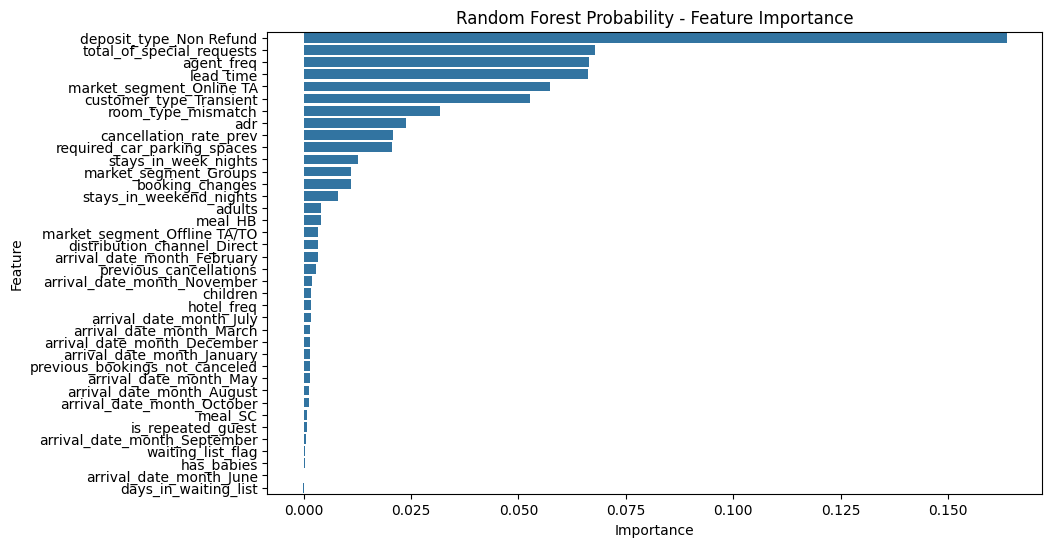

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_perm_rf_clas)
plt.title('Random Forest Probability - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Feature Importance XGBoost
df_perm_xgb_clas = pd.DataFrame({'Feature': X_test_clas.columns, 'Importance': perm_xgb_clas.importances_mean}).sort_values(by='Importance', ascending=False)
df_perm_xgb_clas.head()

,Feature,Importance
24,deposit_type_Non Refund,0.098285
0,lead_time,0.076021
12,total_of_special_requests,0.067867
16,agent_freq,0.065442
25,customer_type_Transient,0.039000


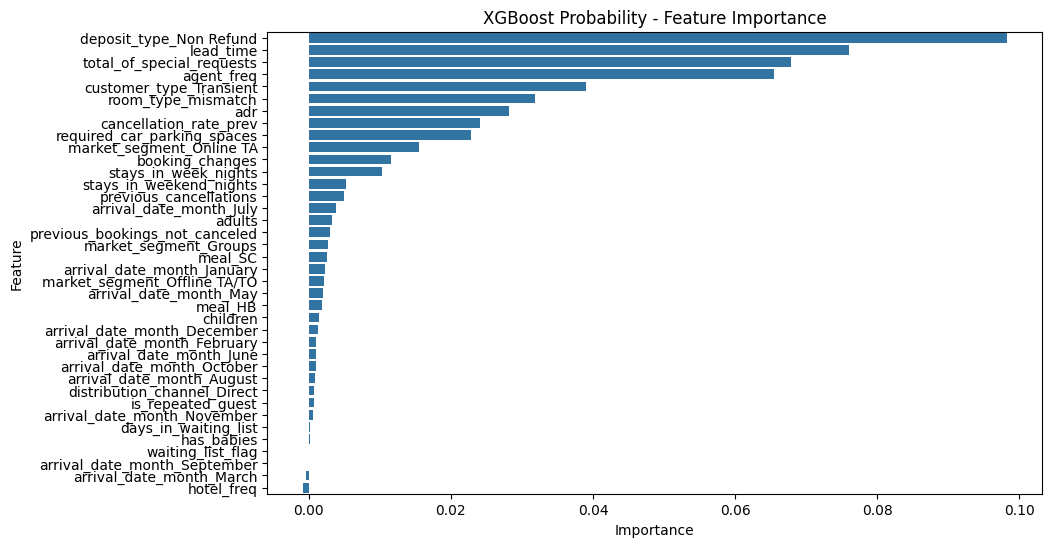

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_perm_xgb_clas)
plt.title('XGBoost Probability - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Feature Importance LightGBM
df_perm_lgbm_clas = pd.DataFrame({'Feature': X_test_clas.columns, 'Importance': perm_lgbm_clas.importances_mean}).sort_values(by='Importance', ascending=False)
df_perm_lgbm_clas.head()

,Feature,Importance
24,deposit_type_Non Refund,0.125479
0,lead_time,0.064977
12,total_of_special_requests,0.057767
16,agent_freq,0.052232
25,customer_type_Transient,0.041660


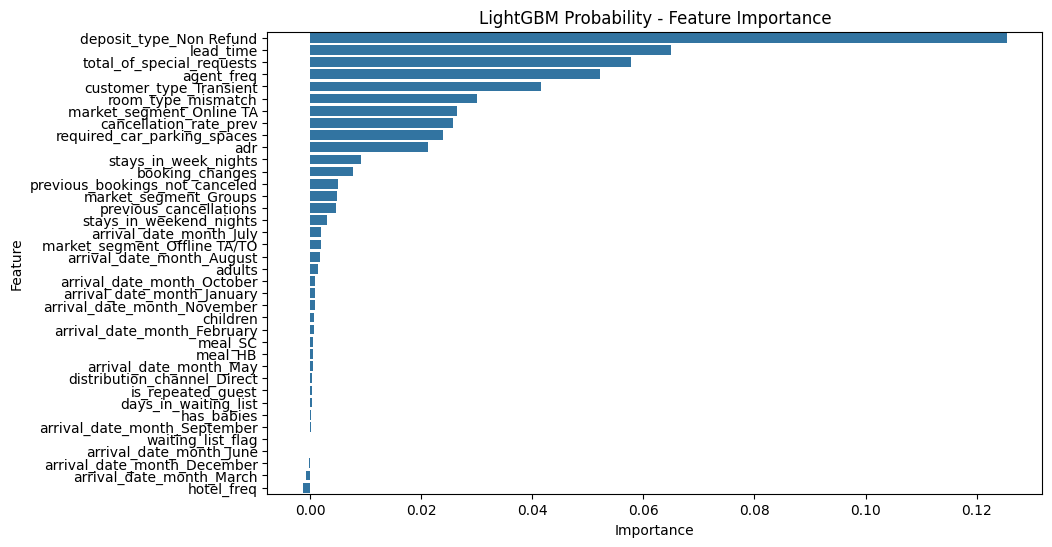

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_perm_lgbm_clas)
plt.title('LightGBM Probability - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**SHAP (Shapley Additive Explanations)**<br>
Memberikan interpretasi kontribusi masing-masing fitur terhadap prediksi model.

In [ ]:
import shap

c:\Users\iProject\anaconda3\envs\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [ ]:
# Take 500 samples from X_test_ema_clas
X_sample_clas = X_test_clas.sample(n=500, random_state=42)

SHAP (SHapley Additive Planations)

In [ ]:
# SHAP RandomForest
explainer_rf_clas = shap.Explainer(best_rf_class_model)
shap_values_rf_clas = explainer_rf_clas(X_sample_clas.values)

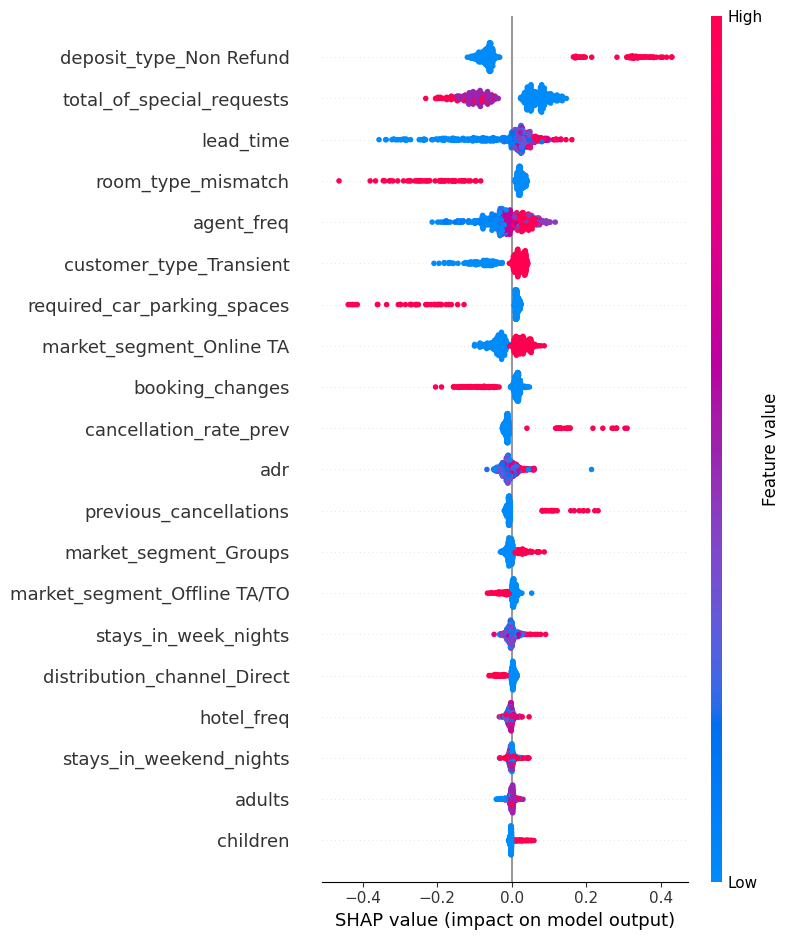

In [ ]:
shap.summary_plot(shap_values_rf_clas[..., 1], features=X_sample_clas, feature_names=X_sample_clas.columns)

In [ ]:
# SHAP XGBoost
explainer_xgb_clas = shap.Explainer(best_xgb_class_model)
shap_values_xgb_clas = explainer_xgb_clas(X_sample_clas.values)

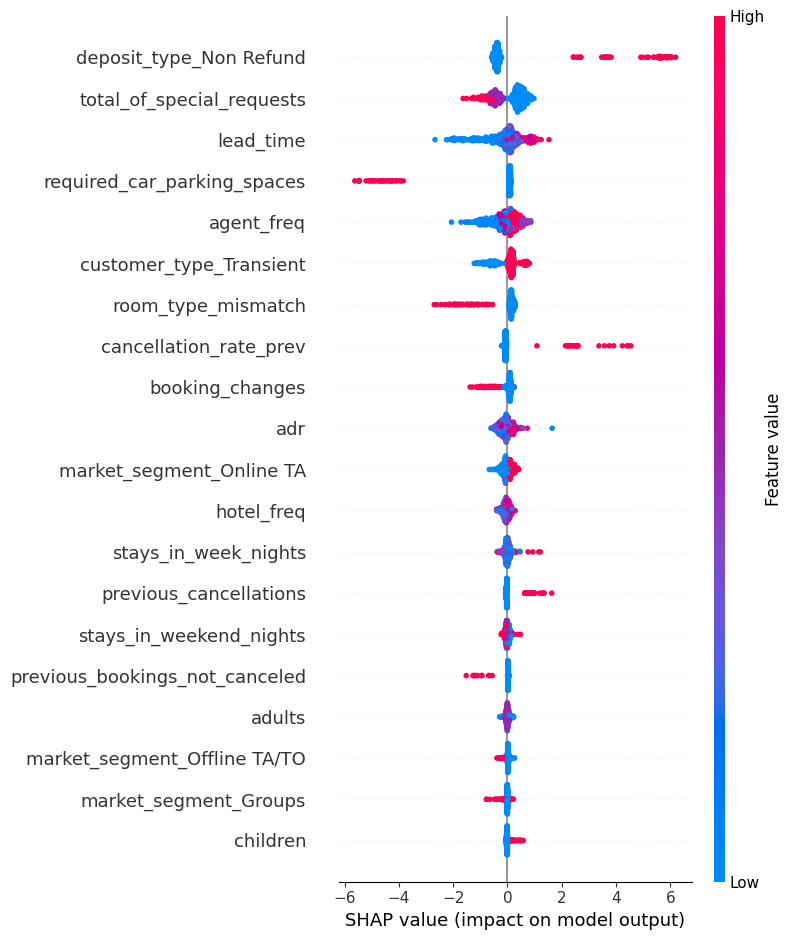

In [ ]:
shap.summary_plot(shap_values_xgb_clas, features=X_sample_clas, feature_names=X_sample_clas.columns)

In [ ]:
# SHAP LightGBM
explainer_lgbm_clas = shap.Explainer(best_lgbm_class_model)
shap_values_lgbm_clas = explainer_lgbm_clas(X_sample_clas.values)

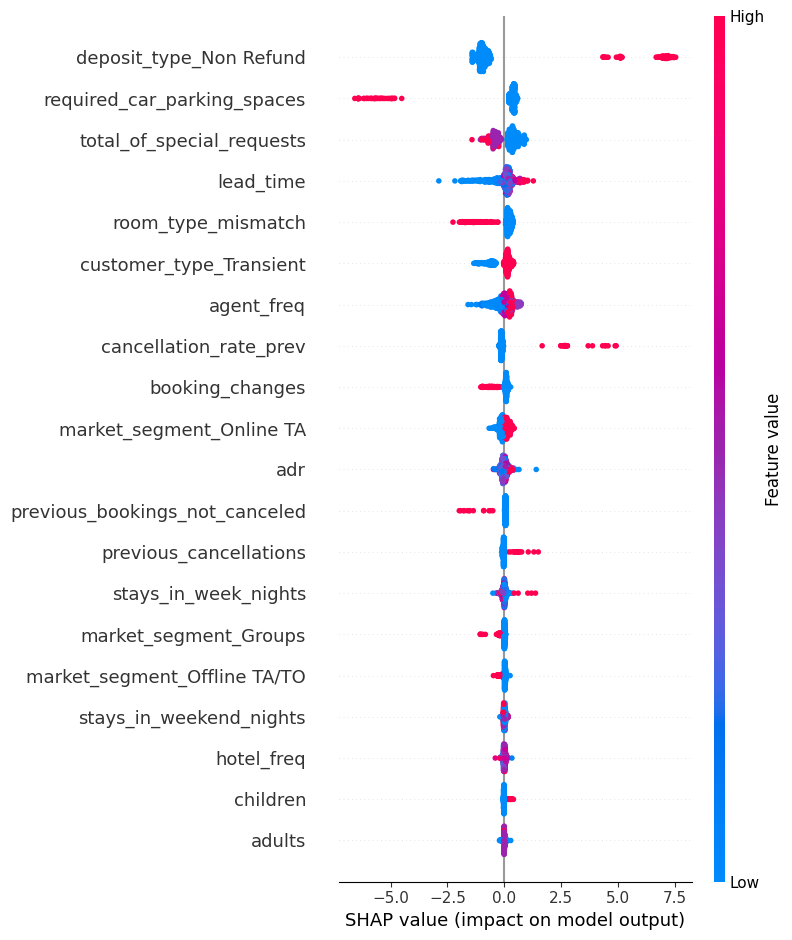

In [ ]:
shap.summary_plot(shap_values_lgbm_clas, features=X_sample_clas, feature_names=X_sample_clas.columns)

## `EVALUATION INTERPRETATION`

### Model Probability

Model RandomForest :
- TP = 2555, FN = 523 → Model dapat mengenali sebagian besar pembatalan dan masih melewatkan 523 kasus (recall = 0.83).
- FP = 686, TN = 4566 → Beberapa pemesanan valid salah diklasifikasikan sebagai pembatalan, namun precision cukup baik (0.79).
- F1-score pembatalan = 0.81 → Seimbang antara presisi dan sensitivitas dalam mendeteksi pembatalan (precision dan recall).
- Accuracy = 85.5% → Performa keseluruhan sangat baik dan layak diintegrasikan dalam sistem prediksi pembatalan booking hotel.

Model XGBoost :
- TP = 2483, FN = 595 → Model mengenali lebih banyak pembatalan, meskipun melewatkan 595 kasus (recall = 0.81).
- FP = 614, TN = 4638 → Beberapa pemesanan valid salah terklasifikasi, precision tetap stabil (0.80).
- F1-score pembatalan = 0.80 → Menunjukkan keseimbangan performa dalam klasifikasi pembatalan (precision dan recall).
- Accuracy = 85.5% → Performa solid dan andal untuk mendukung dalam meminimalkan risiko pembatalan sejak awal reservasi.

Model LightGBM :
- TP = 2447, FN = 631 → Model cukup baik mengenali pembatalan, walaupun ada yang terlewat 631 kasus (recall = 0.79).
- FP = 676, TN = 4576 → Jumlah false positive sedikit lebih tinggi, precision tetap cukup baik (0.78).
- F1-score pembatalan = 0.79 → Performa cukup stabil dalam mengidentifikasi pembatalan (precision dan recall).
- Accuracy = 84.3% → Performa memadai dan tetap layak diterapkan dalam sistem prediksi reservasi hotel.

### Evaluation and Recommendations

Analisis membandingkan tiga model dalam mendeteksi pembatalan (kelas 1).

- Model RandomForest mengenali sebagian besar pembatalan dengan recall 0.83 (TP=2555, FN=523). Precision tinggi 0.79 (FP=686, TN=4566) menunjukkan kesalahan klasifikasi booking valid relatif rendah. F1-score 0.81 menandakan keseimbangan baik antara sensitivitas dan presisi. Akurasi keseluruhan 85.5%, layak digunakan dalam sistem prediksi pembatalan.

- Model XGBoost unggul dengan recall tertinggi 0.81 (TP=2483, FN=595), mengenali lebih banyak pembatalan. Precision stabil 0.80 (FP=614, TN=4638) dan F1-score 0.80 menunjukkan performa seimbang. Akurasi 85.5%, cocok untuk antisipasi risiko sejak awal reservasi meski false positive sedikit lebih tinggi dibanding RandomForest.

- Model LightGBM menunjukkan recall 0.79 (TP=2447, FN=631) dan precision 0.78 (FP=676, TN=4576). F1-score 0.79 menunjukkan performa stabil. Akurasi 84.3%, masih tetap layak diterapkan terutama jika kecepatan inferensi dan efisiensi komputasi diprioritaskan.

Secara keseluruhan:

| Model             | Accuracy | Precision (1) | Recall (1) | F1-Score (1) |
| ----------------- | -------- | ------------- | ---------- | ------------ |
| **Random Forest** | 0.8549   | 0.79          | **0.83**   | **0.81**     |
| **XGBoost**       | 0.8549   | **0.80**      | 0.81       | 0.80         |
| **LightGBM**      | 0.8431   | 0.78          | 0.79       | 0.79         |

- Random Forest direkomendasikan karena recall tertinggi (0.83) dan F1-score terbaik, efektif mendeteksi pembatalan dan meminimalkan risiko
- XGBoost cocok untuk yang ingin keseimbangan baik antara precision dan recall, dengan keunggulan di precision untuk mengurangi false alarm.
- LightGBM pilihan tepat jika kecepatan dan efisiensi komputasi lebih penting, meski performanya sedikit di bawah dua model lainnya.

### Explanatory Model Analysis (EMA)

Probability (Kategori Kecepatan Pengiriman)

| **Kategori Fitur**        | **RandomForest**                                                                                                          | **XGBoost**                                                                                                               | **LightGBM**                                                                                         | **Kesimpulan**                                                                                                                                                             |
| ------------------------- | ------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Top 3 Fitur Utama**     | `deposit_type_Non Refund`, `total_of_special_requests`, `agent_freq`                                                      | `deposit_type_Non Refund`, `total_of_special_requests`, `agent_freq`                                                      | `deposit_type_Non Refund`, `lead_time`, `total_of_special_requests`                                  | Fitur **deposit\_type** dan **total\_of\_special\_requests** sangat berpengaruh. RF dan XGB mengedepankan **agent\_freq**, sementara LGBM lebih menekankan **lead\_time**. |
| **Fitur Penting Lainnya** | `lead_time`, `market_segment_Online TA`, `customer_type_Transient`, `room_type_mismatch`, `adr`, `cancellation_rate_prev` | `lead_time`, `customer_type_Transient`, `market_segment_Online TA`, `adr`, `room_type_mismatch`, `cancellation_rate_prev` | `customer_type_Transient`, `adr`, `market_segment_Online TA`, `agent_freq`, `cancellation_rate_prev` | Faktor pemesanan dan segmen pelanggan tetap memberikan kontribusi penting di ketiga model, meskipun bobotnya berbeda-beda.                                                 |
| **Fitur Minim/Pelemah**   | `arrival_date_month`, `children`, `meal_SC`, `is_repeated_guest`, `has_babies`, `waiting_list_flag`, `hotel_freq`         | `arrival_date_month`, `children`, `meal_SC`, `is_repeated_guest`, `has_babies`, `waiting_list_flag`, `hotel_freq`         | `arrival_date_month`, `meal_SC`, `waiting_list_flag`, `children`, `hotel_freq`                       | Fitur-fitur ini memiliki kontribusi yang sangat kecil atau bahkan negatif, berpotensi menjadi noise dalam prediksi.                                                        |
| **Perbedaan Model**       | Memberikan bobot terhadap banyak fitur, termasuk fitur dengan pengaruh terbatas                                           | Cenderung lebih stabil dalam pemilihan fitur, lebih fokus pada faktor utama                                               | Lebih ringkas dan selektif, hanya mempertahankan fitur yang sangat relevan                           | LGBM menyaring fitur lebih ketat, sementara RF dan XGB masih memasukkan sejumlah fitur dengan kontribusi terbatas.                                                         |
| **Hubungan Umum**         | Menunjukkan dominasi fitur pemesanan awal seperti deposit dan permintaan khusus                                           | Menekankan kombinasi antara informasi keuangan dan karakteristik pemesan                                                  | Fokus kuat pada variabel yang tersedia sejak awal pemesanan                                          | Menekankan pentingnya **fitur yang tersedia sejak awal pemesanan** untuk meningkatkan akurasi prediksi pembatalan.                                                         |

### Business Recommendations

Probability (Cancellation Booking)

| **Rekomendasi Bisnis**                                 | **Tindakan & Penjelasan**                                                                                                                                                                              |
| ------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| 1. **Batasi Pemesanan Non-Refundable**                 | • Karena tipe deposit *Non Refund* sangat berpengaruh pada pembatalan, batasi kuota pemesanan tipe ini.<br>• Tawarkan opsi *Refundable* untuk pelanggan berisiko tinggi agar mengurangi risiko cancel. |
| 2. **Optimalkan Penanganan Permintaan Khusus**         | • Pelanggan dengan banyak *special requests* cenderung membatalkan lebih tinggi.<br>• Berikan klarifikasi dan konfirmasi tambahan untuk mengurangi ketidakpuasan dan pembatalan.                       |
| 3. **Evaluasi dan Kontrol Agen/Penyalur**              | • Fitur `agent_freq` penting, artinya frekuensi penggunaan agen tertentu terkait pembatalan.<br>• Audit dan seleksi agen atau platform pemesanan yang sering menghasilkan pembatalan tinggi.           |
| 4. **Tawarkan Fleksibilitas untuk Early Booking**      | • Pelanggan yang booking jauh-jauh hari (lead\_time panjang) lebih rawan cancel.<br>• Sediakan opsi perubahan jadwal tanpa biaya atau diskon kecil untuk menjaga mereka tetap memesan.                 |
| 5. **Personalized Retargeting untuk Segmen Online TA** | • Fokus pada pelanggan segmen *Online TA* dengan pendekatan personal seperti pengingat otomatis, diskon ulang tahun, atau penawaran eksklusif.<br>• Tingkatkan loyalitas dan kurangi pembatalan.       |